# IBM HR Attrition Rate Problem 

IBM data description:-

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Here we have to predict that the employee will Attrite or not

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_auc_score, f1_score, roc_curve
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.preprocessing import LabelEncoder, power_transform, StandardScaler

After importing all the needed Libraries we are good to go with Data Importation Using Pandas

In [2]:
#Importing Dataset from local Directory using Pandas.read_csv() and storing it in a variable
ds = pd.read_csv('~/Desktop/Datatrained/IBM HR Attrition Rate Analytics/IBMAttrition.csv')

In [3]:
#importation is completed and the datasets is stored in ds variable
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


From above code we came to know that the dataset has been imported in 'ds' variable of Pandas Dataframe

By using ds.head() we can see first 5 rows of the whole datasets we can view more number of rows by using ds.head(10) or ds.head(20) or any number inside head()

In [4]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


From above we can see out output varible that is Attrition it is a classification problem

by looking  at the above data we can see that the dataset is a mixture of object, int type of data to know more information about the data we will use ds.info()

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

from above we can see that there are 1470 rows of data and there are 26 int data and 9 object type of data we will later convert object type to get insights from those columns

from above we can also tell that there are 35 columns in the dataset and there is no missing values in the dataset

lets now confirm it

In [6]:
r , c = ds.shape
print("There are total {} no of rows and {} no of columns".format(r, c))

There are total 1470 no of rows and 35 no of columns


from above we can see that there are 1470 rows and 35 columns the same number that we have see in ds.info()

lets now see at the missing data in the dataset`

In [7]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

lets now find missing values using visualization

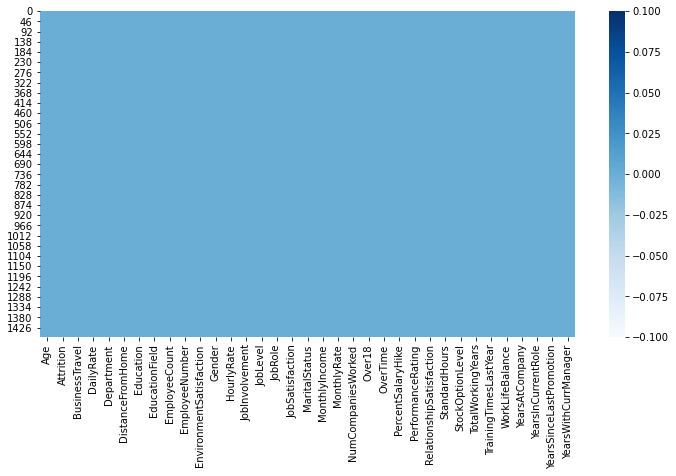

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap='Blues')

from above visualization we can see that there is only one colur in the heatmap so there is no missing values in the dataset

In [9]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


lets see all the columns names using ds.columns

In [10]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

From above we came to know all the column names

lets see some more information about the data

In [11]:
print(ds['Age'].min())
print(ds['Age'].max())
print(ds['Age'].mean())

18
60
36.923809523809524


from above we can see that there is a minimum age of 18 Years in the dataset and maximum age of 60 and mean of the Age columns is 36

Lets now see the Monthly Income of the Employees

In [12]:
print(ds['MonthlyIncome'].min())
print(ds['MonthlyIncome'].max())
print(ds['MonthlyIncome'].mean())

1009
19999
6502.931292517007


Here we can see the minimum monthly income is 1009 and maximum us 19999

Lets now see some stastics about the data using ds.describe

In [13]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


By looking at the stastics we can see that the data has some outliers in the dataset we will fix it in later point of time.

Lets Visualize the same

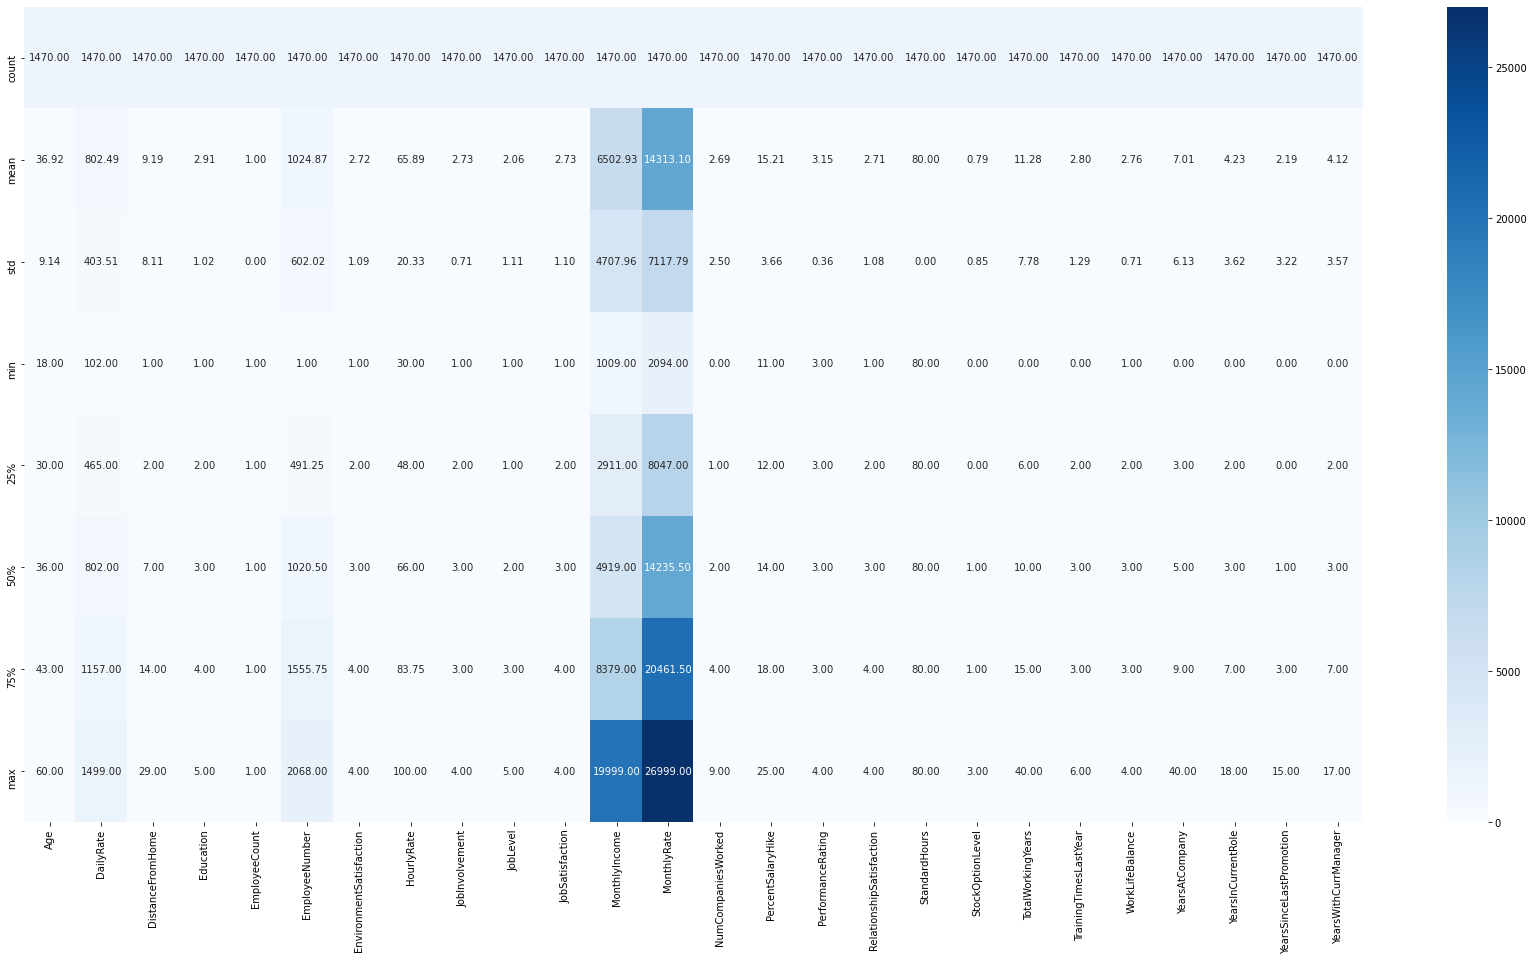

In [14]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.describe(), annot=True, cmap='Blues',fmt='.2f')

from here we can easily see where the outliers are present

In [15]:
ds.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


From above we can only see object data from the datset

### Lets start EDA process to know more about the data 

In [16]:
pd.set_option('display.max_columns', None)

By using the above method we can see all the columns in the dataset

In [17]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


lets Start Visualization of the datset

from above we can see there are almost same number of Male and Female in the dataset

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


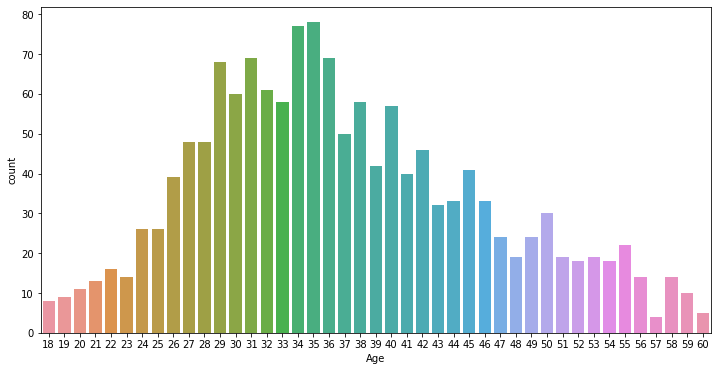

In [18]:
print(ds['Age'].value_counts())
plt.figure(figsize = (12,6))
sns.countplot(ds['Age'])

From above we can see the age distribution of data

([<matplotlib.patches.Wedge at 0x11ba8e790>,
 [Text(-0.9618916732177651, 0.5336332157899546, 'No'),
  Text(1.0493363707830163, -0.5821453263163142, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.6121128829567595, -0.3395847736845166, '16%')])

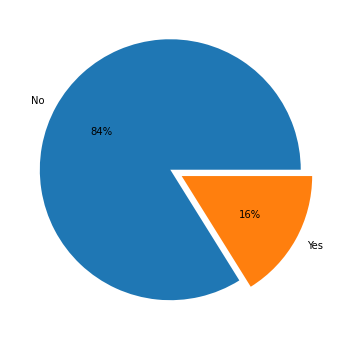

In [19]:
plt.figure(figsize=(6,6))
plt.pie(ds['Attrition'].value_counts(),labels=['No','Yes'] ,autopct = '%1.0f%%' , explode=(0 , 0.1))

from above we can see that more number of employee are not attrite that is 84% of them want to stay with the company

In [20]:
label = ds['BusinessTravel'].unique()

([<matplotlib.patches.Wedge at 0x11bba6a60>,
 [Text(-0.6728966948858768, 0.8701781645224519, 'Travel_Rarely'),
  Text(0.39754488975683344, -1.1322358679304536, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.34661910016714703, 'Non-Travel')],
 [Text(-0.3670345608468419, 0.47464263519406463, '71%'),
  Text(0.23190118569148616, -0.6604709229594312, '19%'),
  Text(0.5694334372784109, -0.18906496372753473, '10%')])

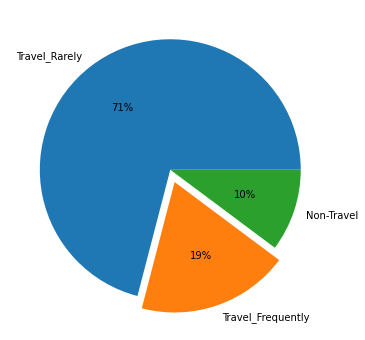

In [21]:
plt.figure(figsize=(6,6))
plt.pie(ds['BusinessTravel'].value_counts(),labels=label ,autopct = '%1.0f%%' , explode=(0 , 0.1, 0))

from here we understand that most employee doesn't travel only 19% of them travel frequently

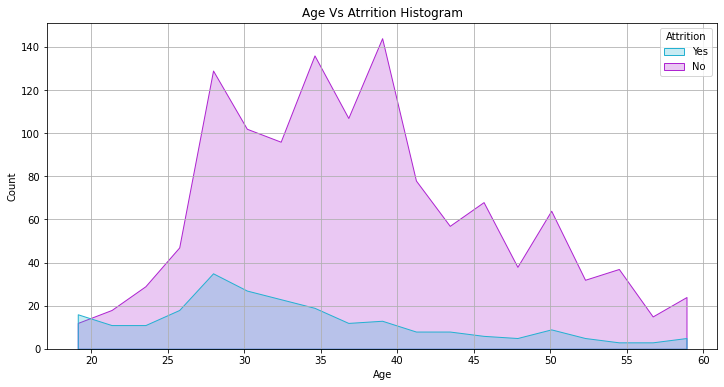

In [22]:
plt.figure(figsize = (12,6))
sns.histplot(x='Age' ,hue='Attrition' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Age Vs Atrrition Histogram")
plt.grid()

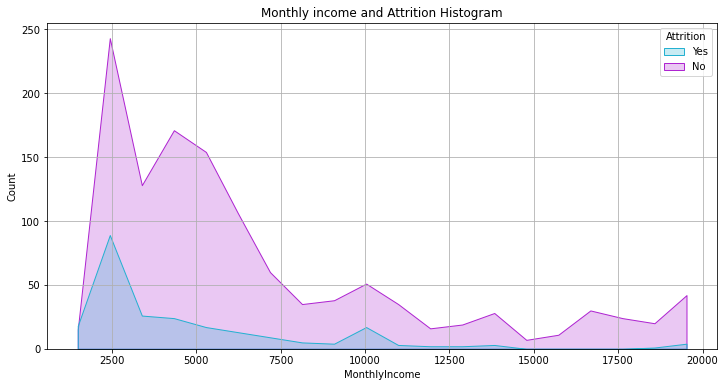

In [23]:
plt.figure(figsize = (12,6))
sns.histplot(x='MonthlyIncome' ,hue='Attrition' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') )
plt.title("Monthly income and Attrition Histogram")
plt.grid()

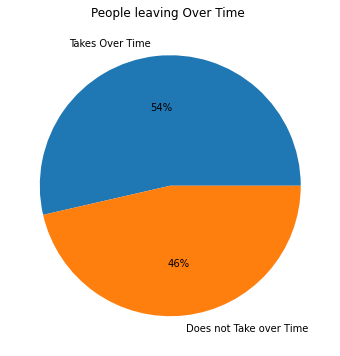

In [24]:
plt.figure(figsize = (6,6))
values = [ds.Attrition[(ds.Attrition == 'Yes')&(ds.OverTime == 'Yes')].count() ,ds.Attrition[(ds.Attrition == 'Yes')&(ds.OverTime == 'No')].count()]
plt.pie(values , labels=['Takes Over Time ' , 'Does not Take over Time '] , autopct='%1.0f%%' );
plt.title("People leaving Over Time ");

from above we can see the attrition of people who are leaving over time

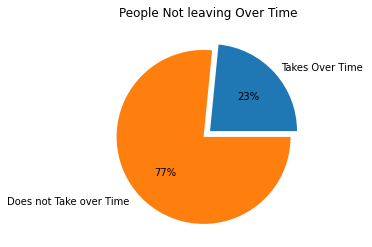

In [25]:
values = [ds.Attrition[(ds.Attrition == 'No')&(ds.OverTime == 'Yes')].count() ,ds.Attrition[(ds.Attrition == 'No')&(ds.OverTime == 'No')].count()]
plt.pie(values , labels=['Takes Over Time ' , 'Does not Take over Time '] , autopct='%1.0f%%' , explode=(0,0.1));
plt.title("People Not leaving Over Time ");

from above we can see the attrition of people who are not leaving over time

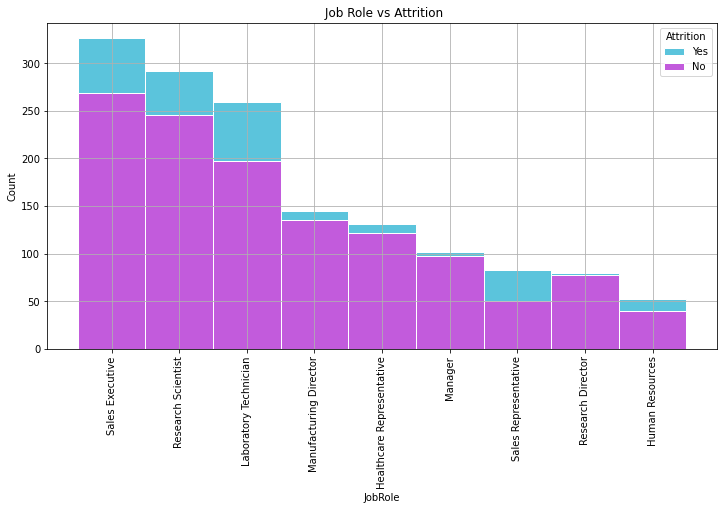

In [26]:
plt.figure(figsize = (12,6))
sns.histplot(x='JobRole' ,hue='Attrition' , data=ds , multiple='stack',palette=('#24b1d1', '#ae24d1'), edgecolor='white')
plt.title(" Job Role vs Attrition")
plt.xticks(rotation=90)
plt.grid()

from here we can see most of the employee are happy with there Job role and they are staying with the company

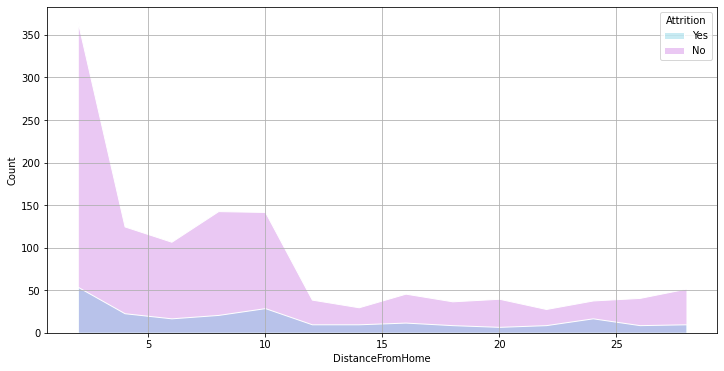

In [27]:
plt.figure(figsize = (12,6))
sns.histplot(x='DistanceFromHome' ,hue='Attrition' , data=ds ,palette=('#24b1d1', '#ae24d1'), element='poly',edgecolor='white')
plt.grid()

In [28]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


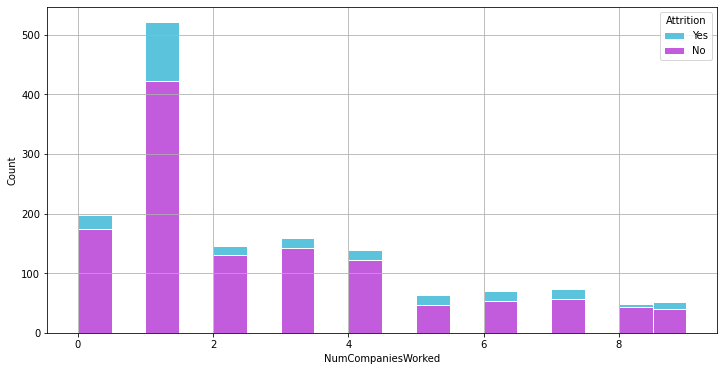

In [29]:
plt.figure(figsize=(12 , 6))
sns.histplot(x='NumCompaniesWorked' , hue='Attrition' , data=ds  ,multiple='stack' , palette=('#24b1d1', '#ae24d1'), edgecolor='white')
plt.grid()

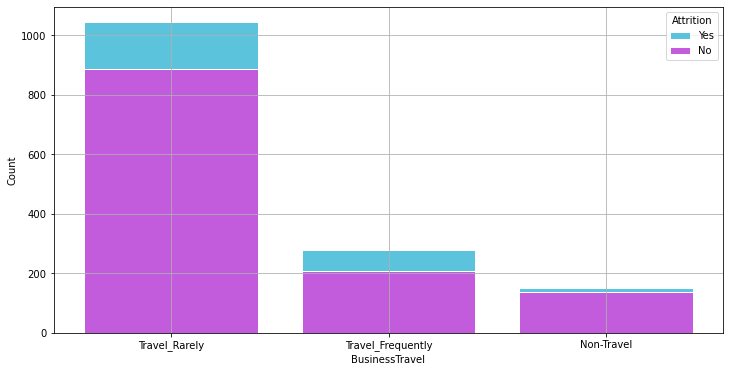

In [30]:
plt.figure(figsize=(12 , 6))
sns.histplot(x='BusinessTravel' , hue='Attrition' ,data=ds , multiple='stack' ,palette=('#24b1d1', '#ae24d1') , edgecolor='white' , shrink=0.8);
plt.grid()

In [31]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


lets now remove the column we don't need

In [32]:
ds

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [33]:
ds.drop(['EmployeeNumber' ] , inplace=True , axis=1)

In [34]:
ds['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

We will also remove EmployeeCount

In [35]:
ds.drop(['EmployeeCount' ] , inplace=True , axis=1)

In [36]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [37]:
ds.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


lets now do label encoding to the data so that we can get more insights from the data

In [38]:
le = LabelEncoder()

In [39]:
ds[ds.select_dtypes(include=['object']).columns]  = ds[ds.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [40]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


as we have successfully converted all the column in Numeric data lets now see stastics of the data using ds.describe

In [41]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


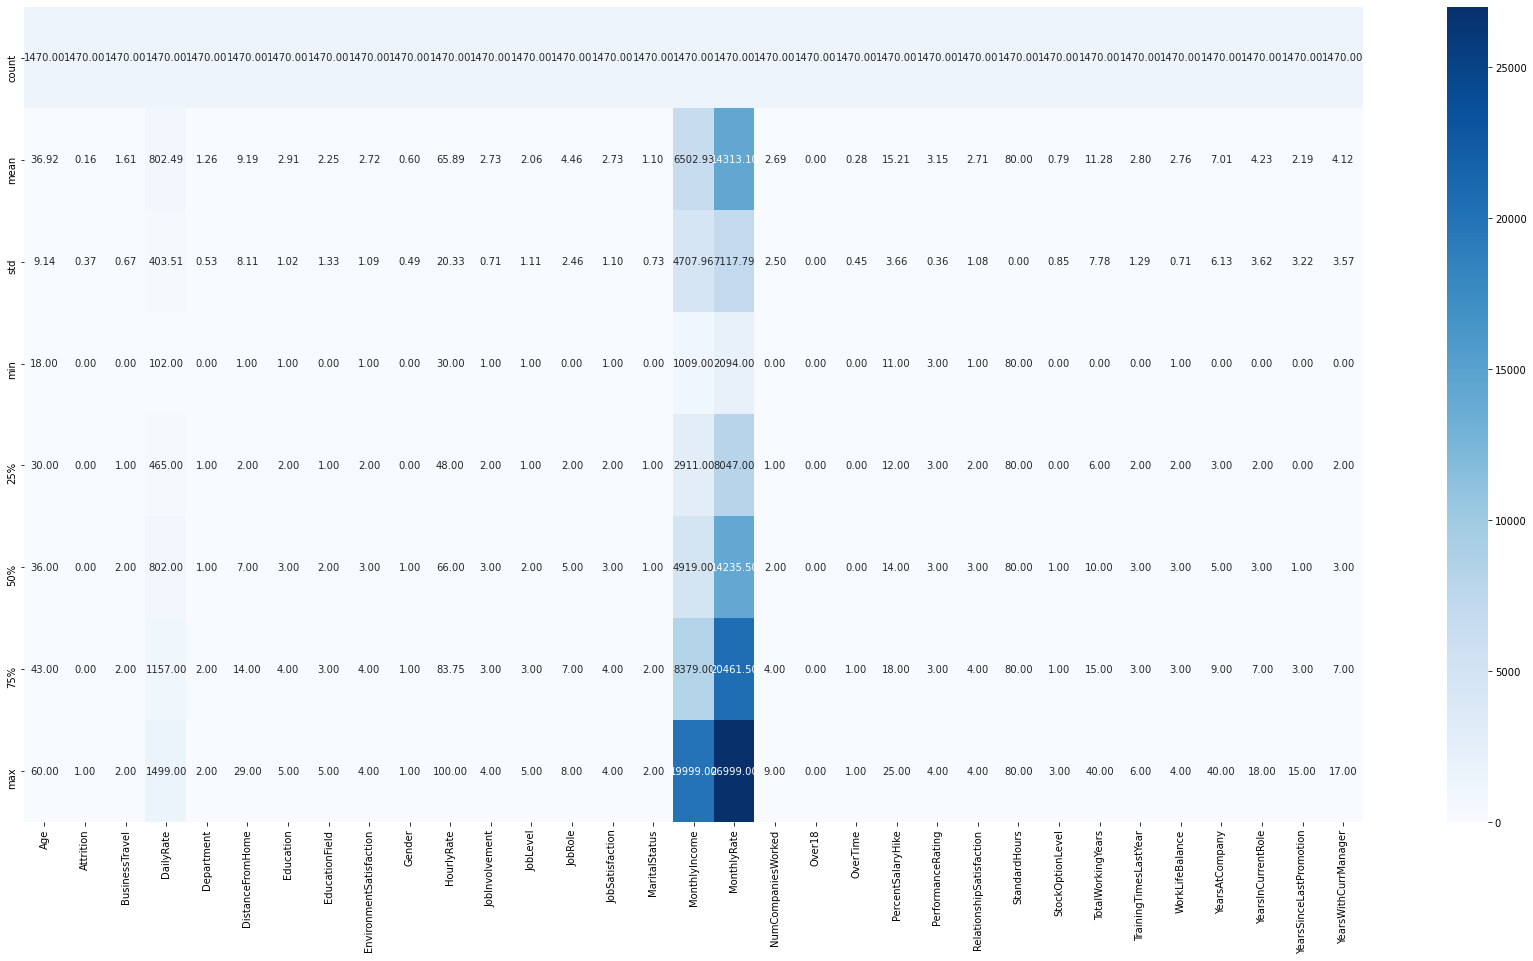

In [42]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.describe(), cmap = 'Blues', annot = True, fmt='.2f')

so from here we can see that there are some outliers in the dataset lets now fix it lets visualize the outliers in the dataset

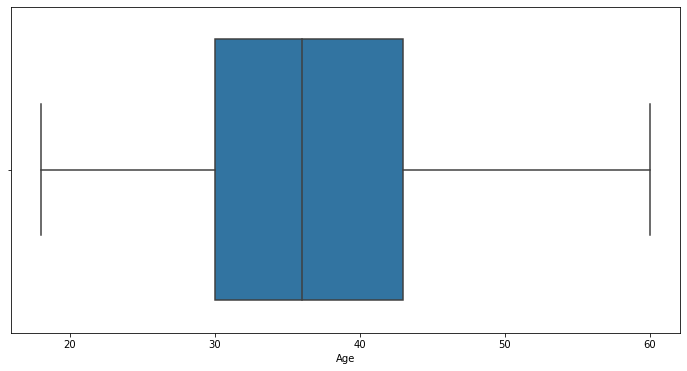

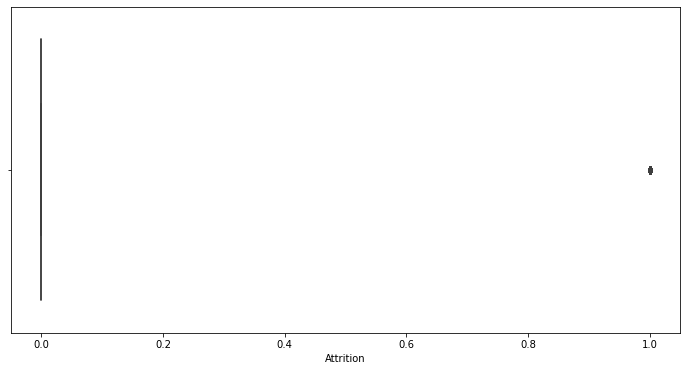

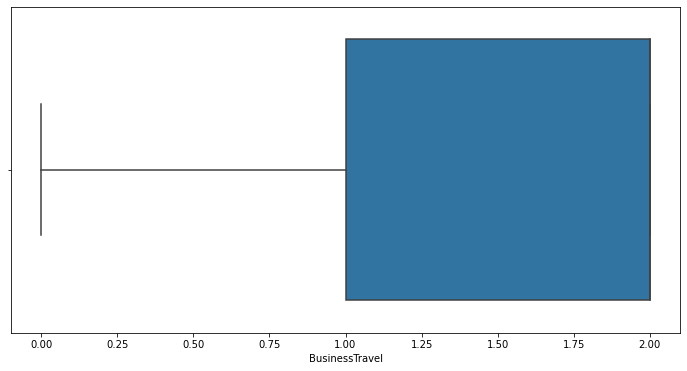

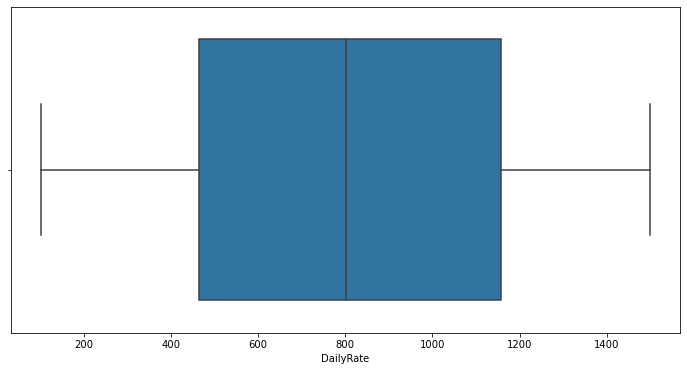

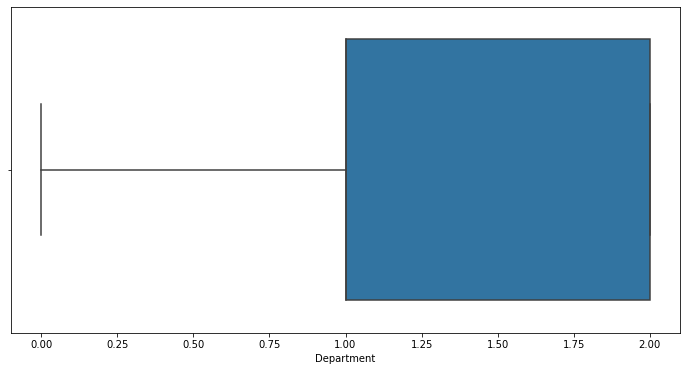

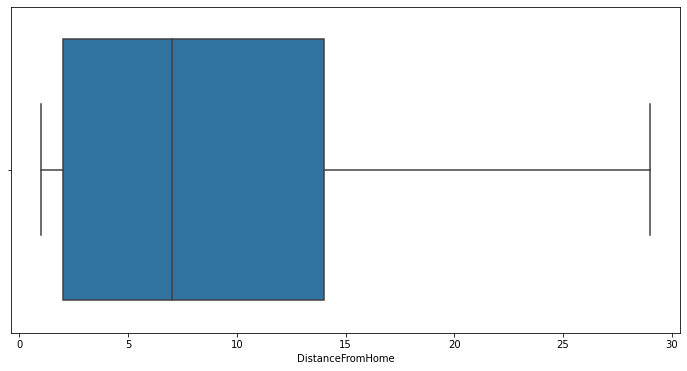

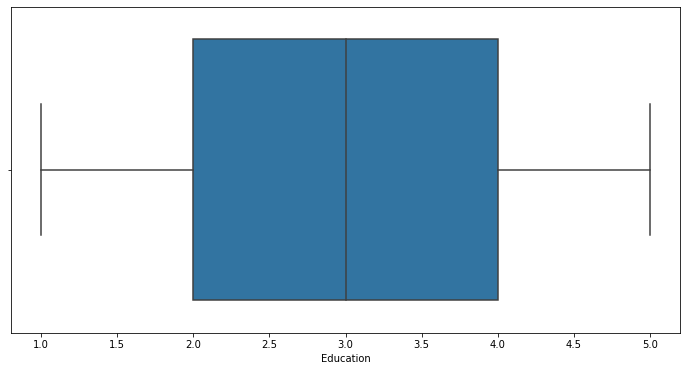

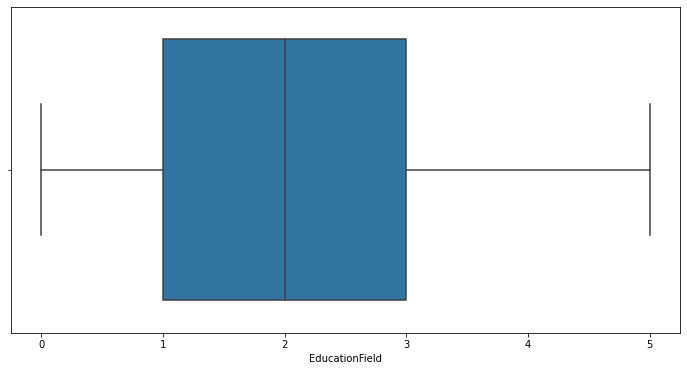

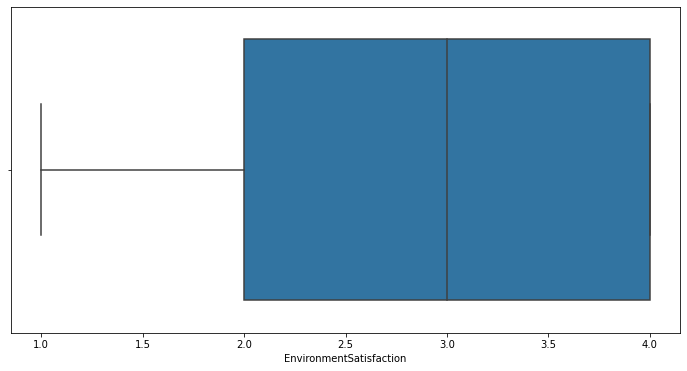

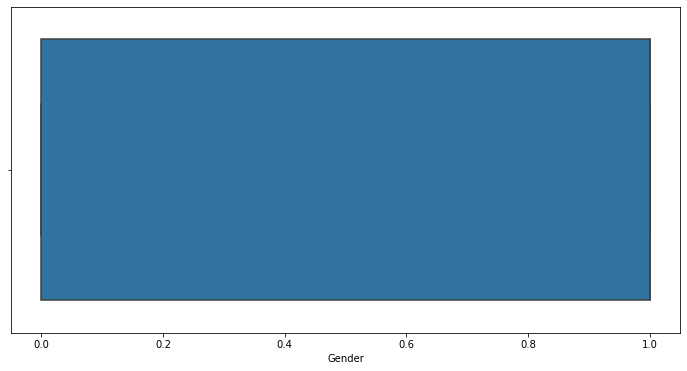

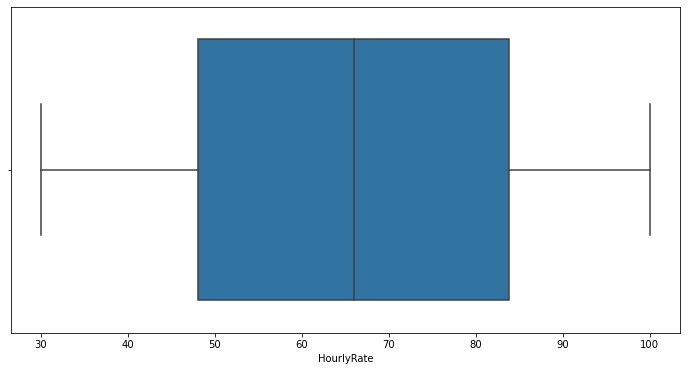

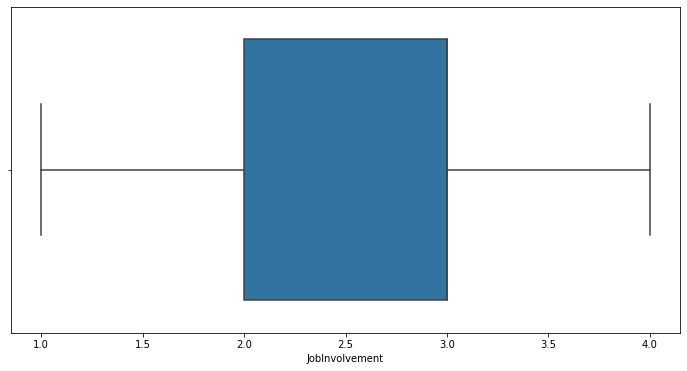

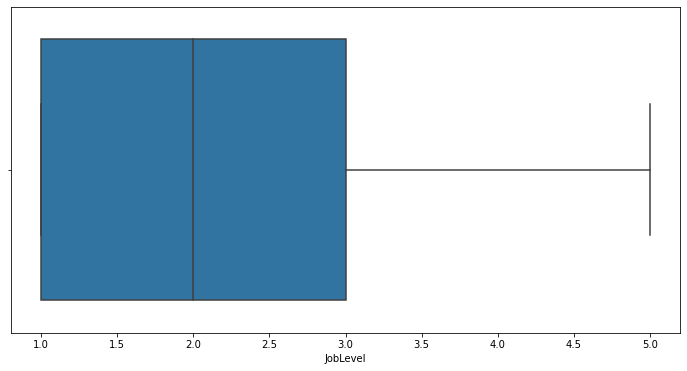

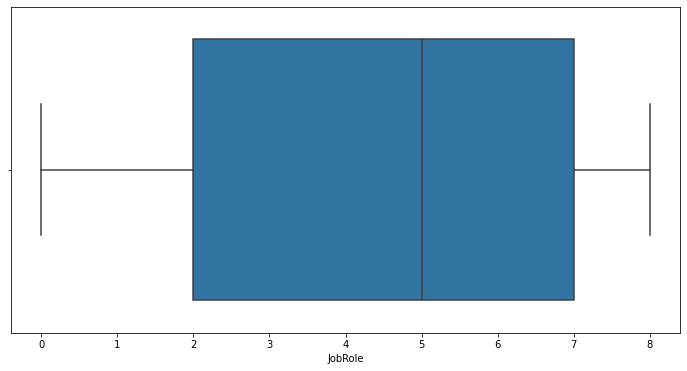

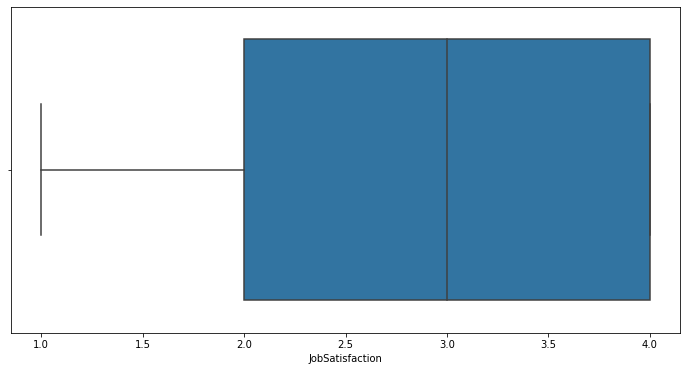

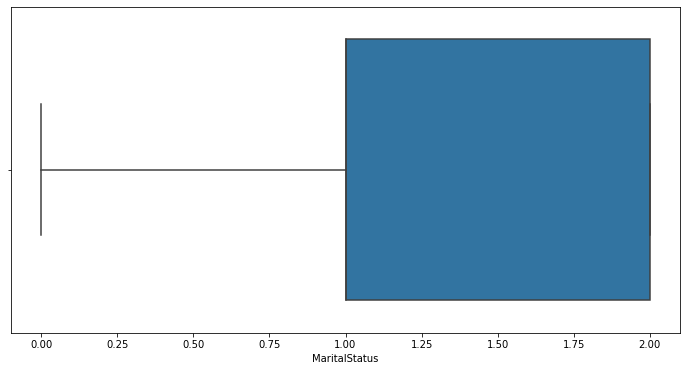

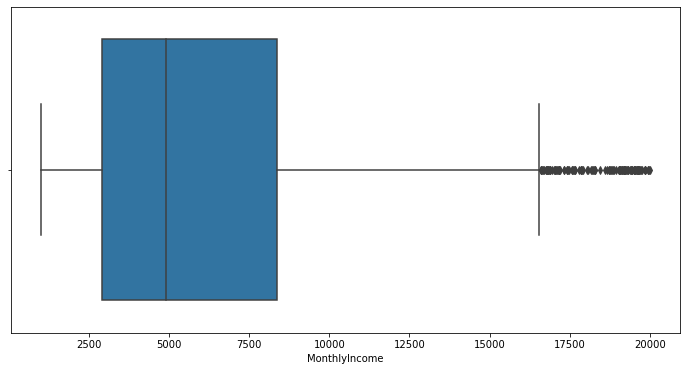

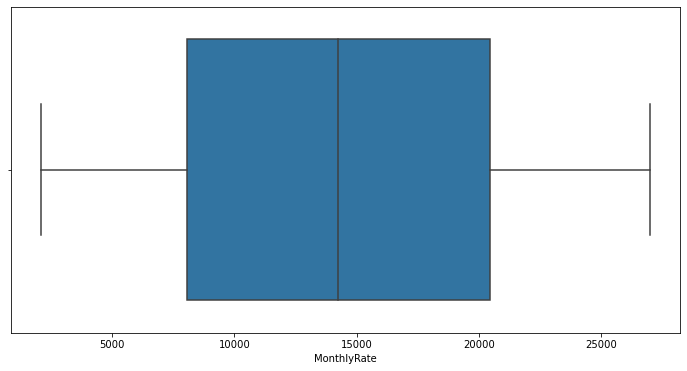

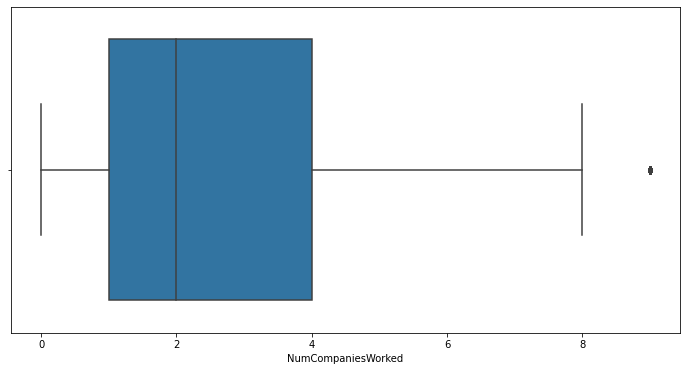

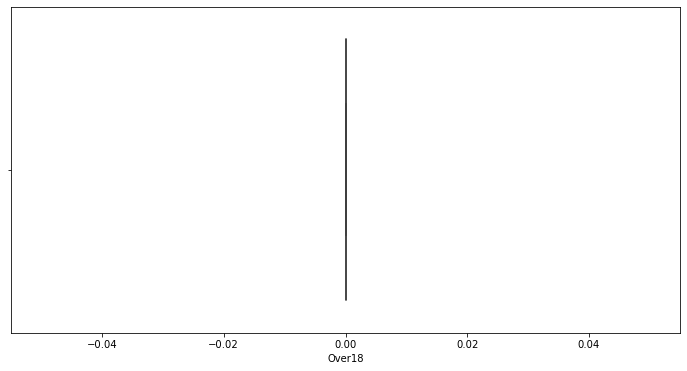

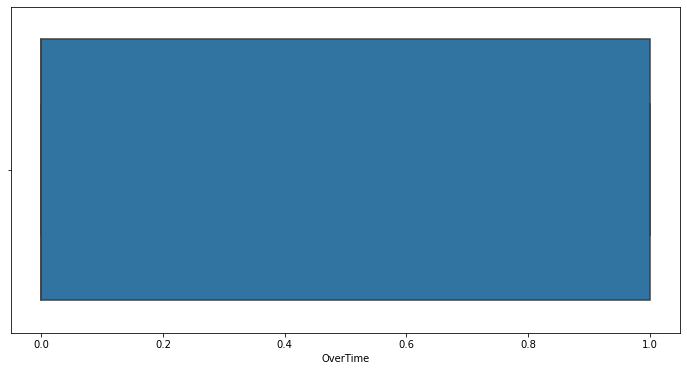

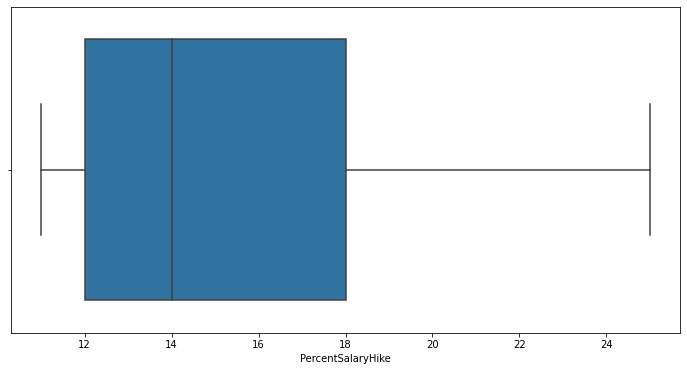

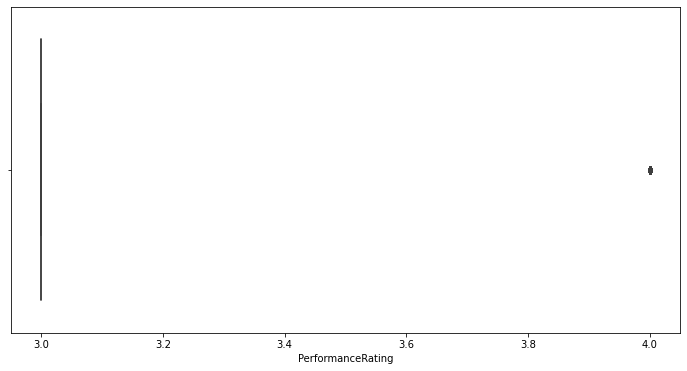

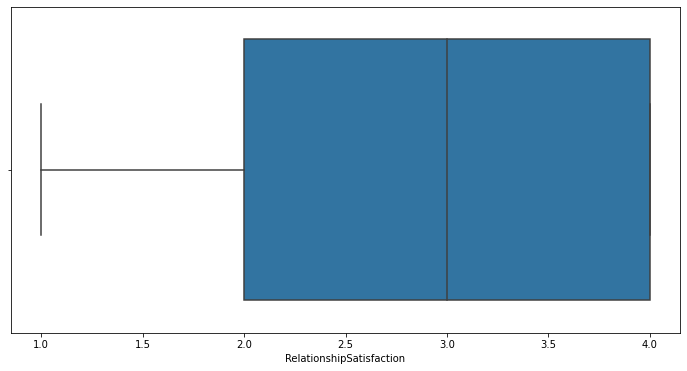

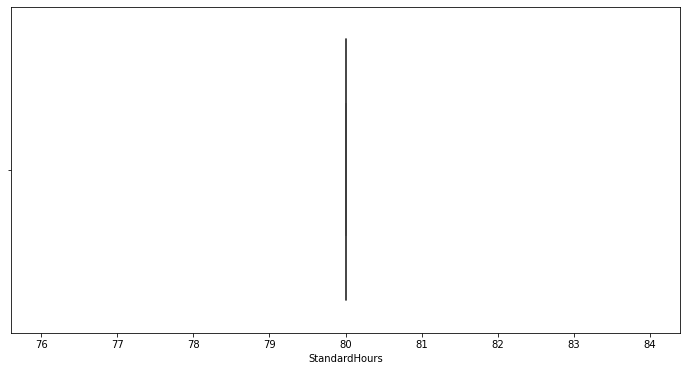

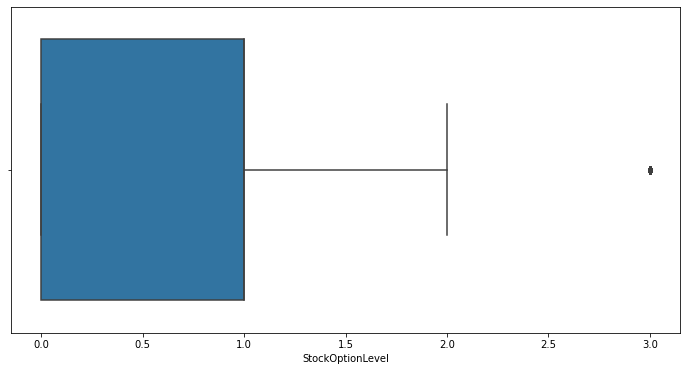

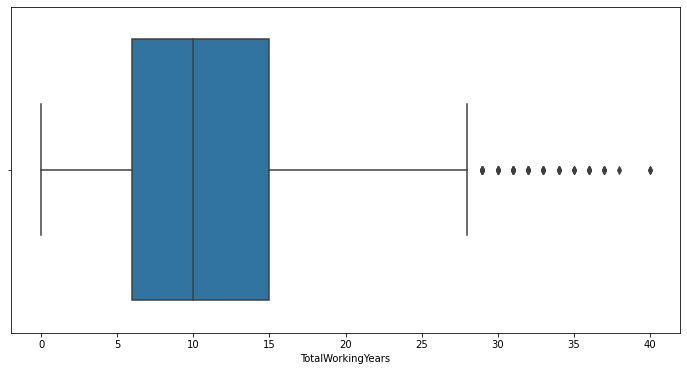

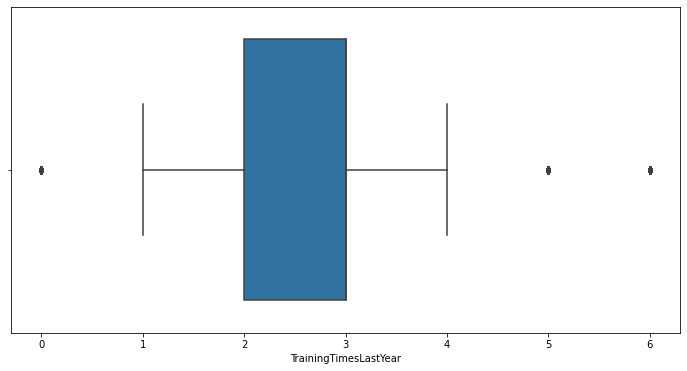

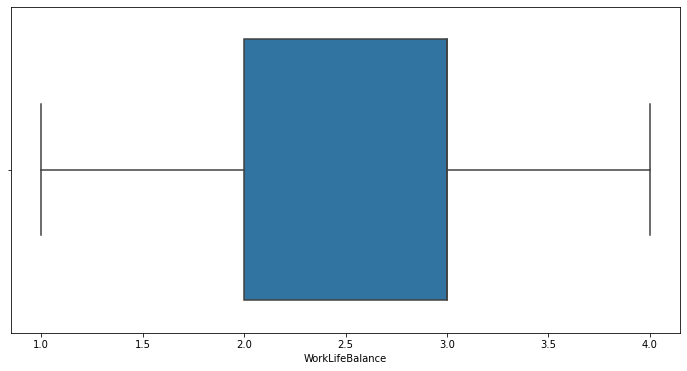

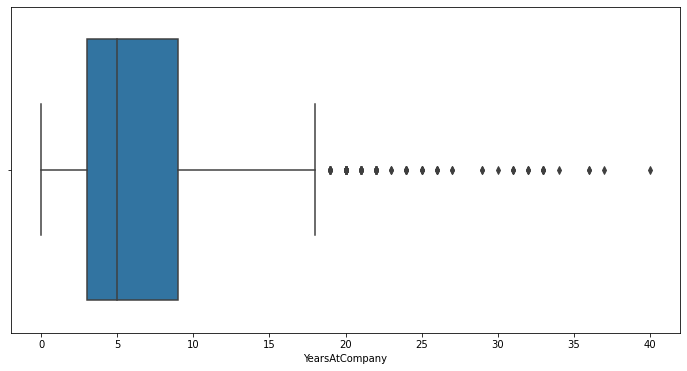

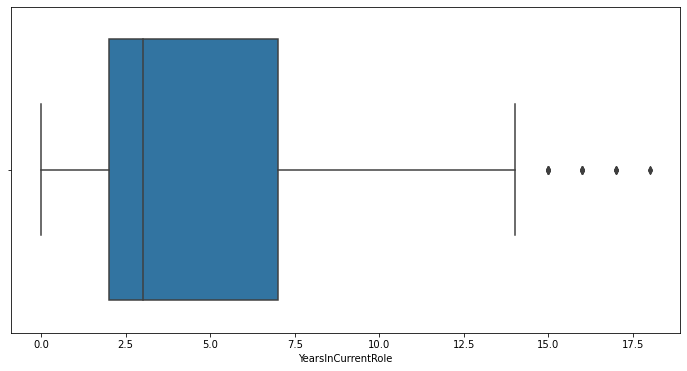

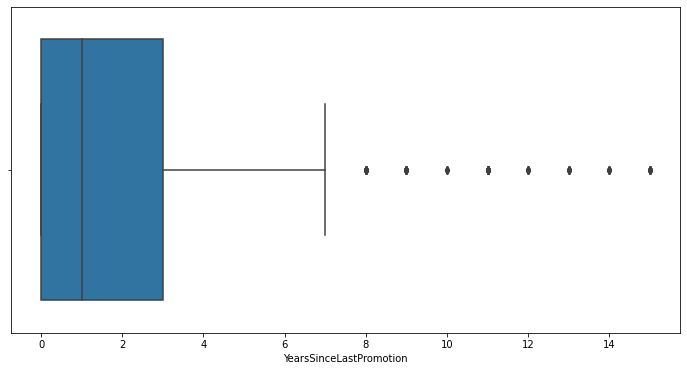

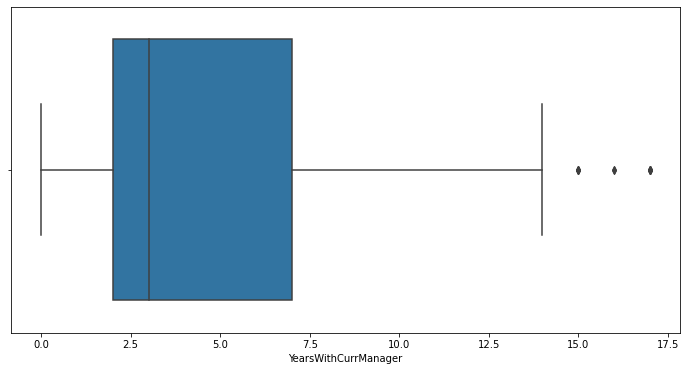

In [43]:
for i in ds.columns:
    plt.figure(figsize = (12,6))
    sns.boxplot(ds[i])

from above we came to know that Attrition, BusinessTravel, Department, Education, Gender, Jobrole, maritial status, over 18 and overtime are object type so we will fix outliers except this columns

As there are many outliers in monthly income we will only fix that columns

In [44]:
ds.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,NaN,0.070132,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,NaN,-0.041924,0.002733,-0.013859,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


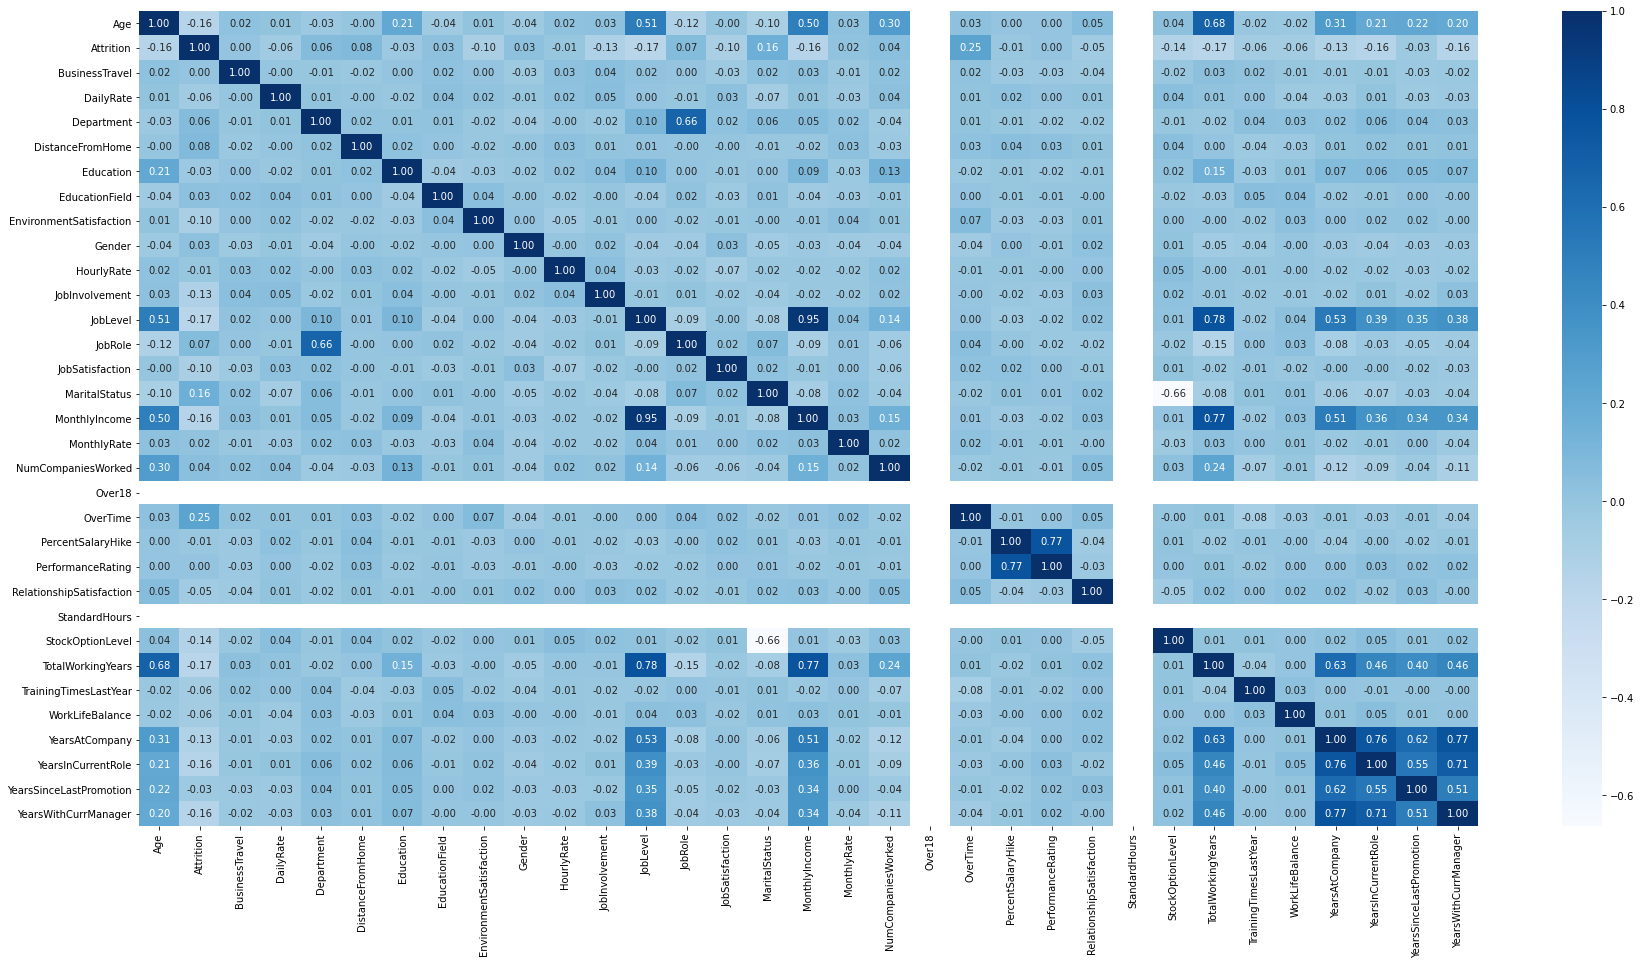

In [45]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.corr(), annot = True, cmap='Blues', fmt='.2f')

from here we see that over 18 and standardhours don't have correlation so we will drop both this columns from the dataset

In [46]:
ds.drop(['Over18', 'StandardHours'], axis = 1, inplace = True)

In [47]:
ds.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


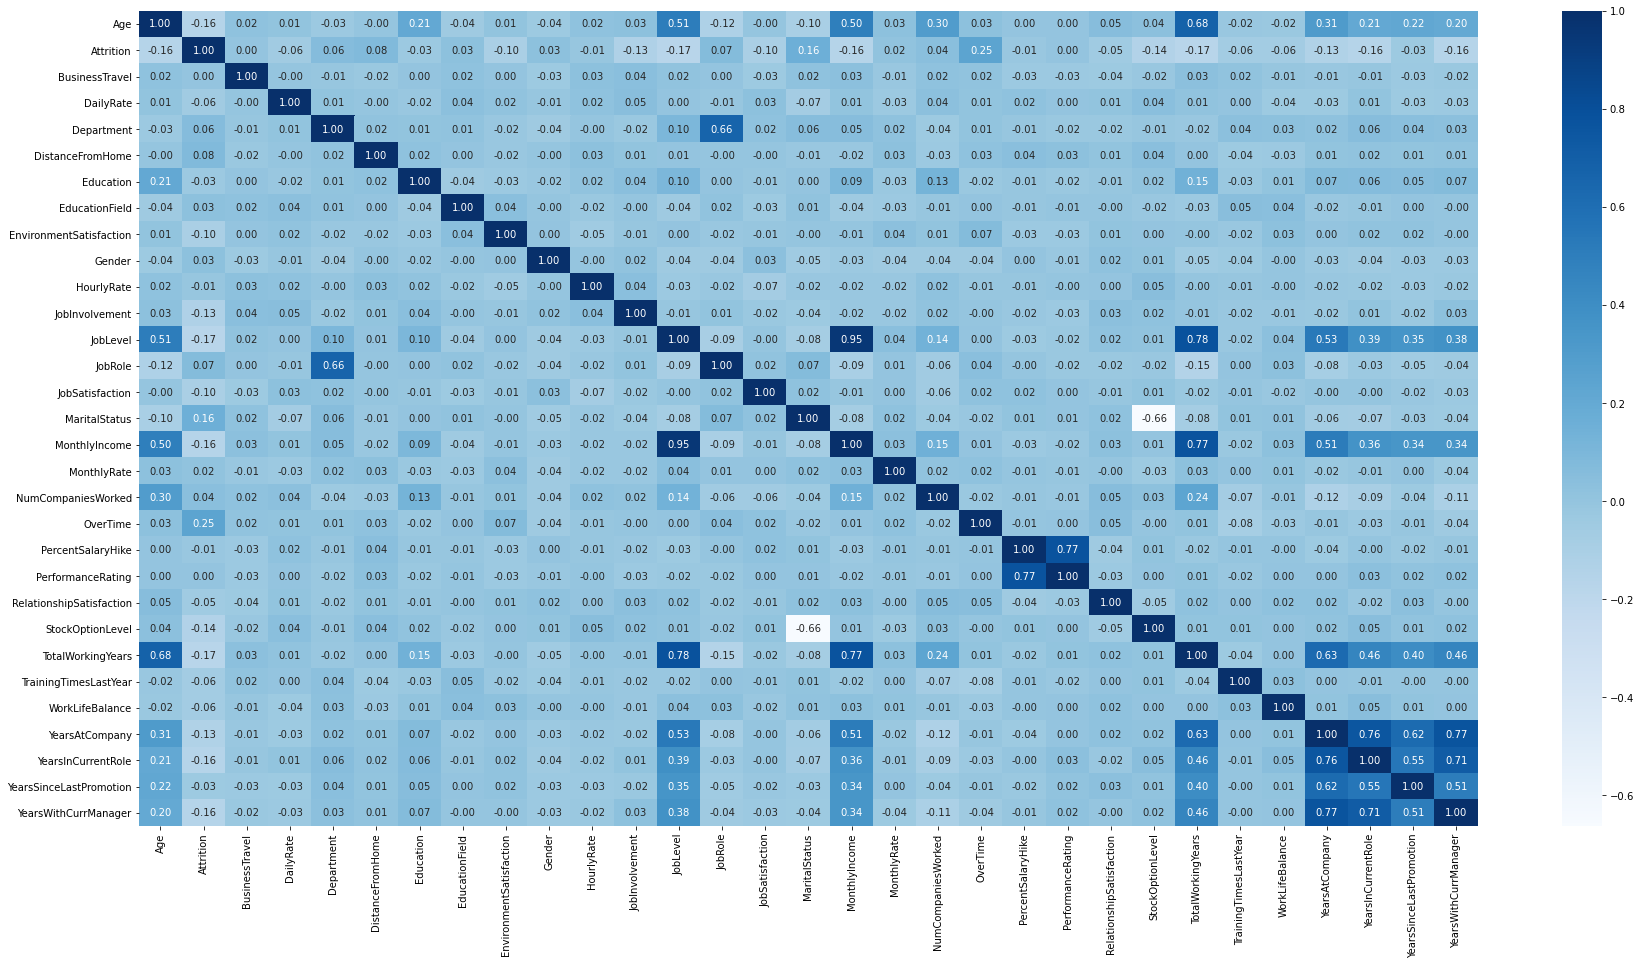

In [48]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.corr(), annot = True, cmap='Blues', fmt='.2f')

Now we can see the correlation of the dataset

In [49]:
ds.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

As we know Attrition, BusinessTravel, Department, Education, Gender, Jobrole, maritial status, over 18 and overtime are object type so we will fix skewness except this columns

In [50]:
columns = ['DistanceFromHome','EducationField','JobLevel','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [51]:
ds[columns]=power_transform(ds[columns])
ds.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

from above we can see that we have fixed all the numeric columns and left the objects columns as it was

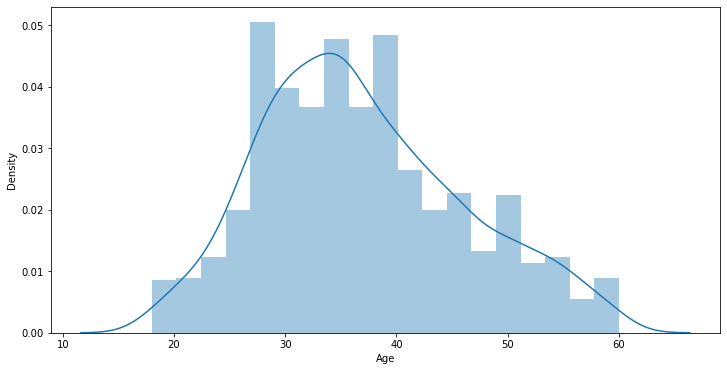

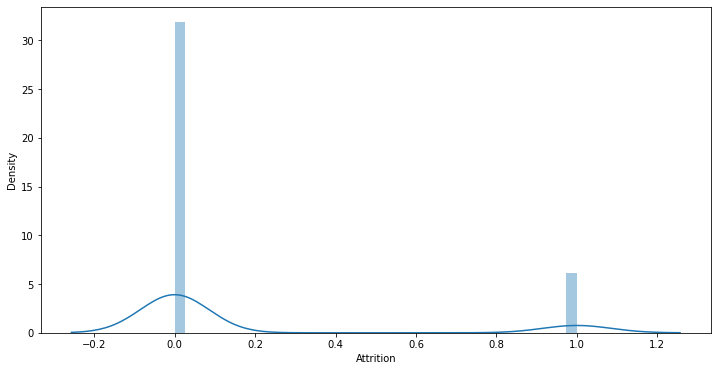

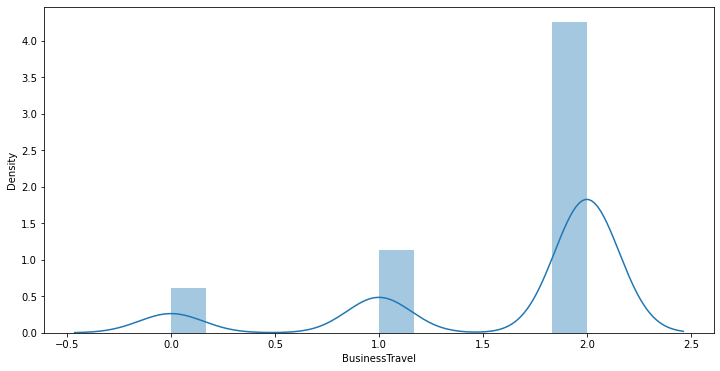

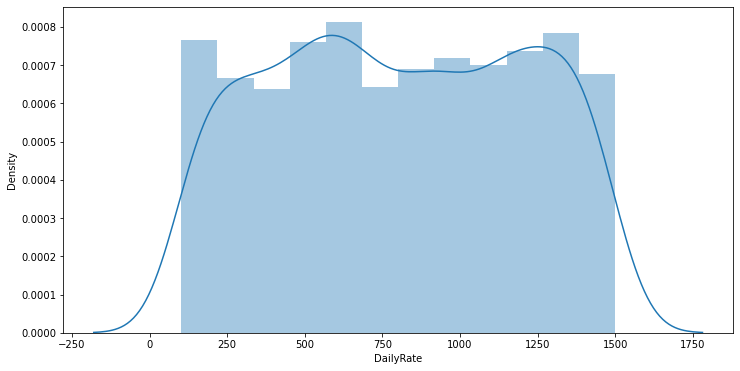

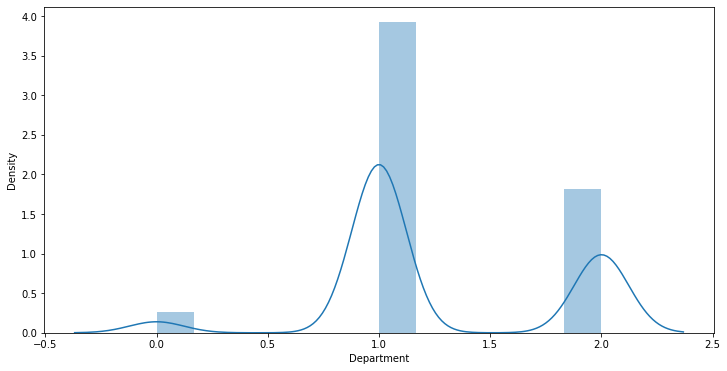

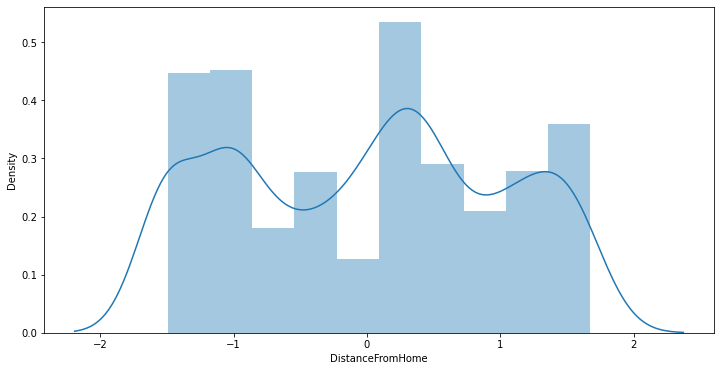

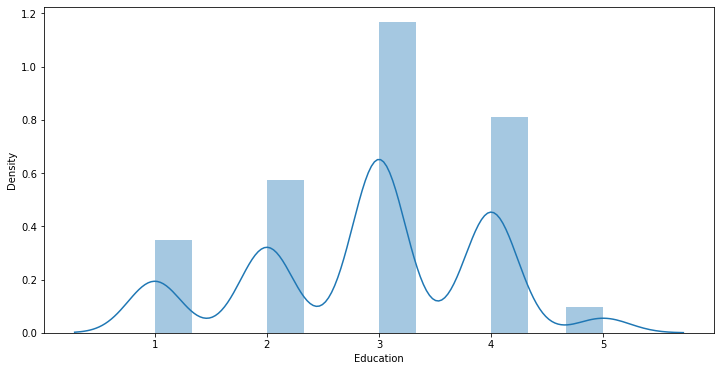

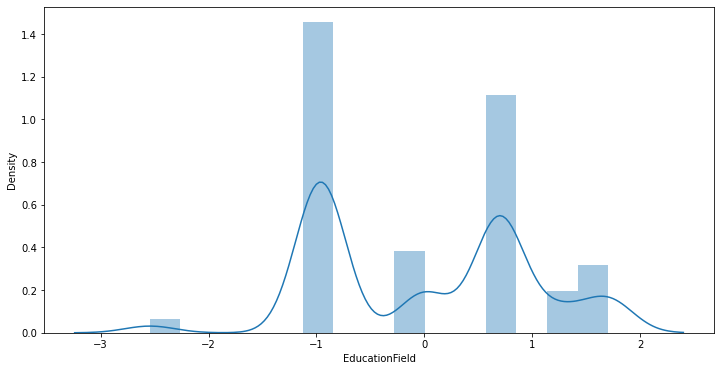

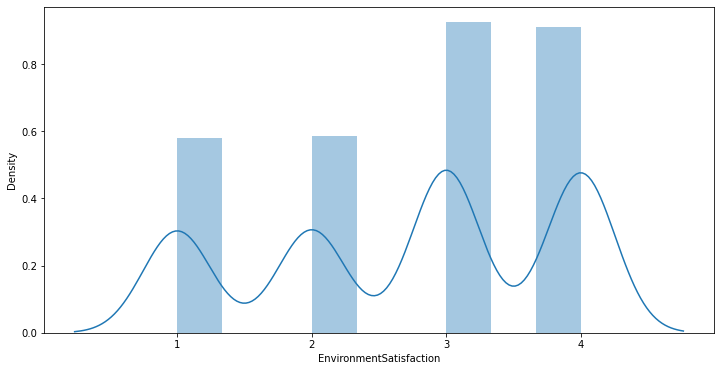

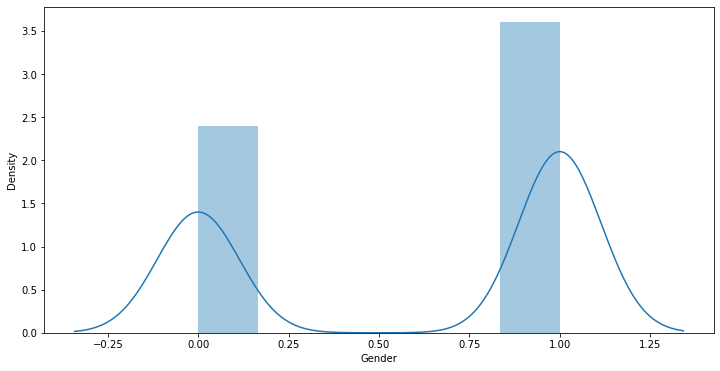

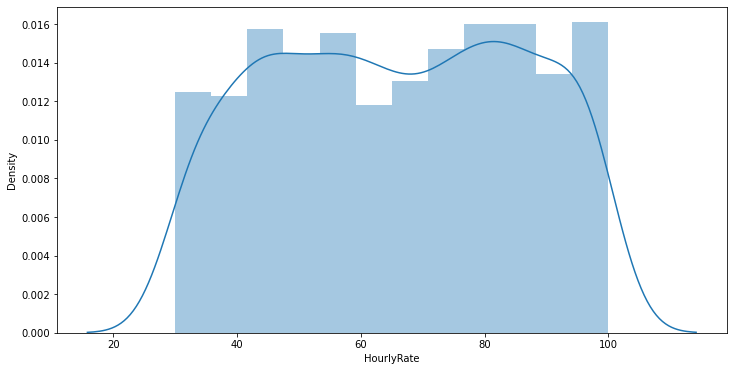

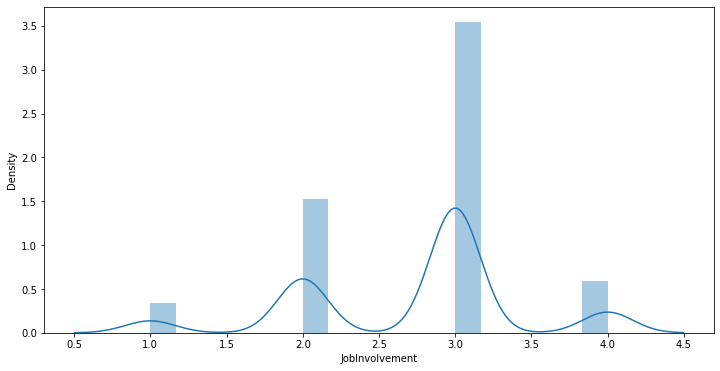

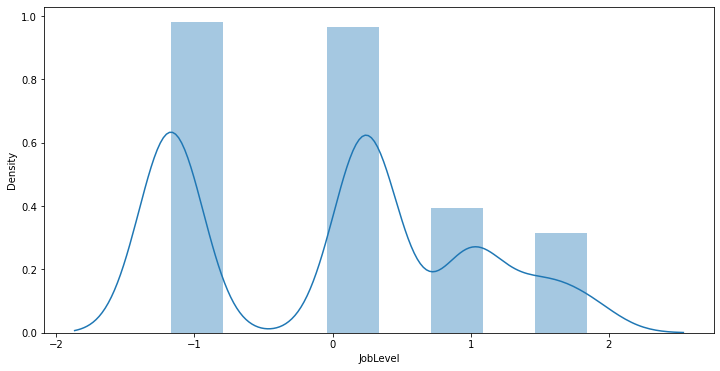

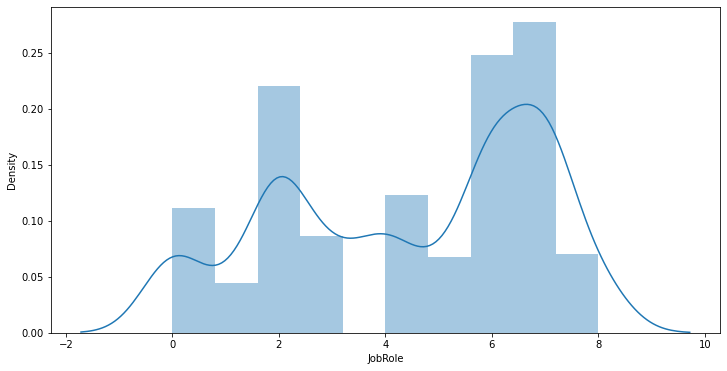

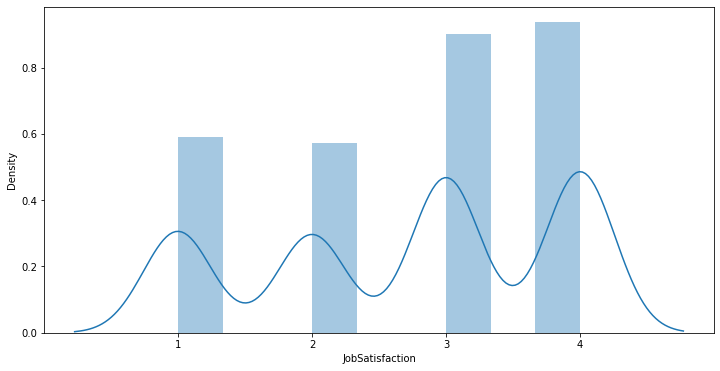

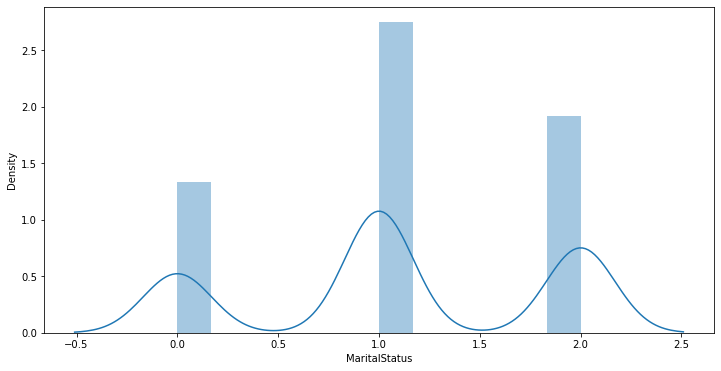

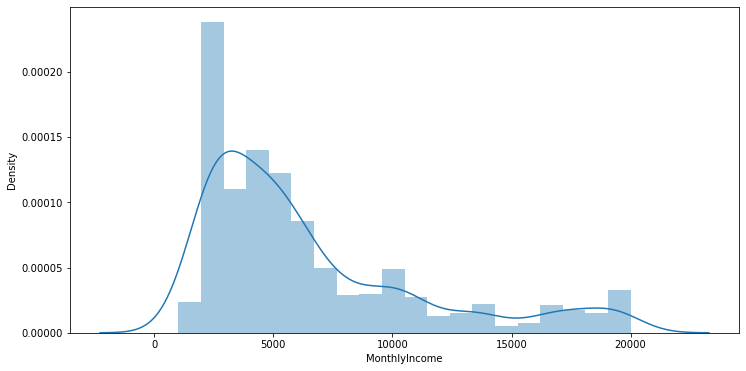

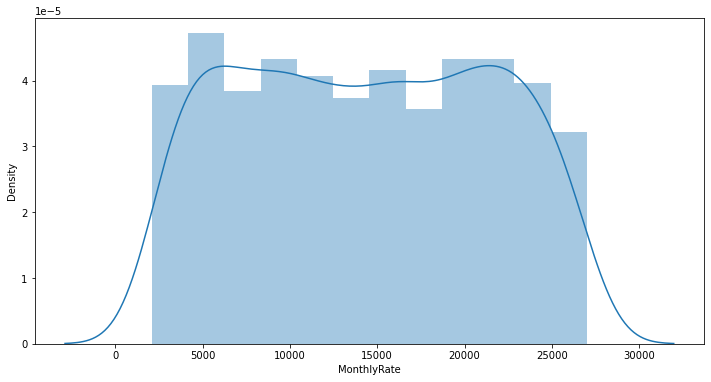

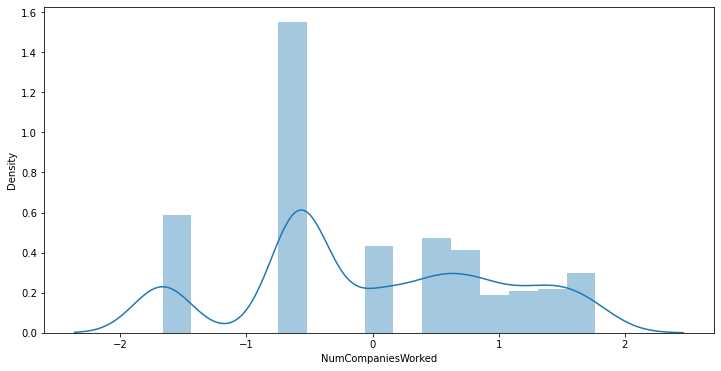

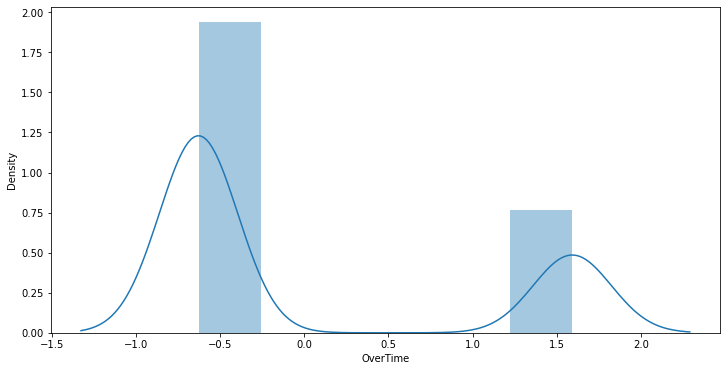

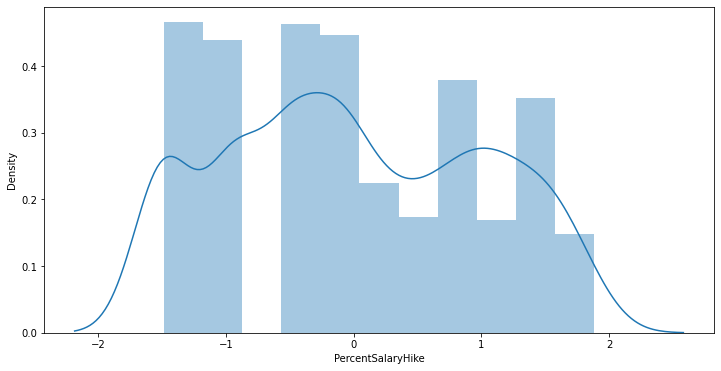

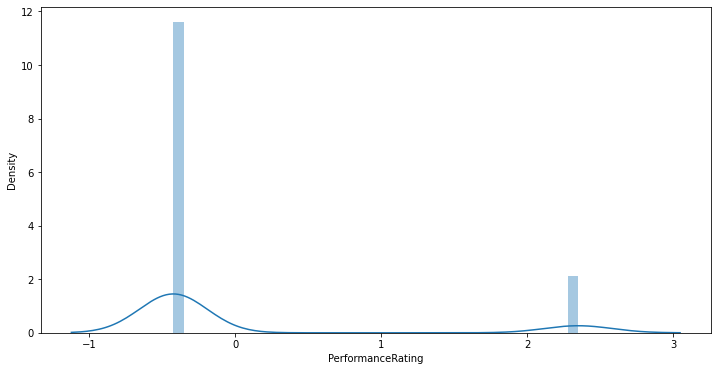

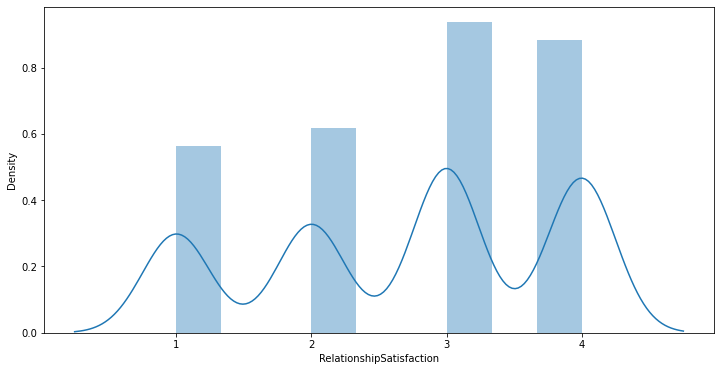

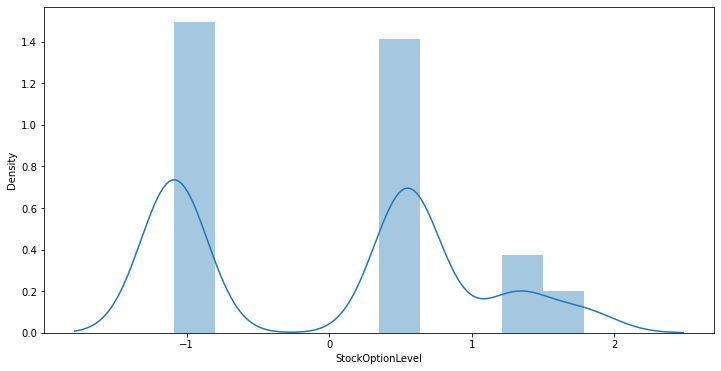

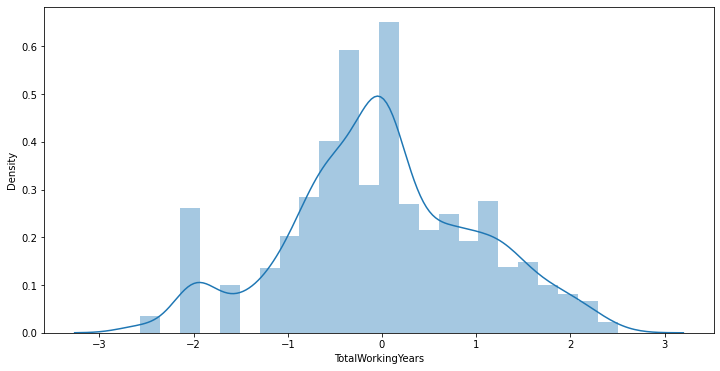

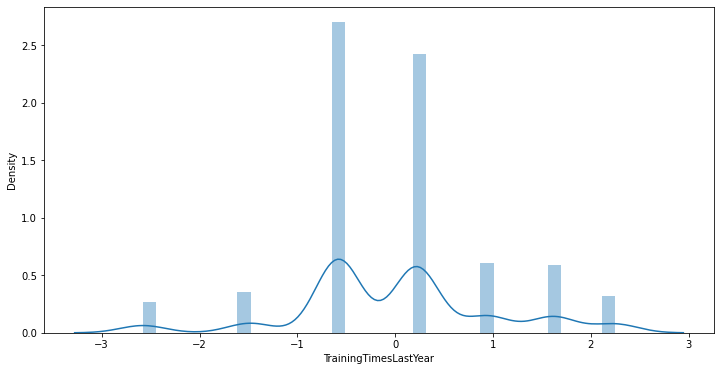

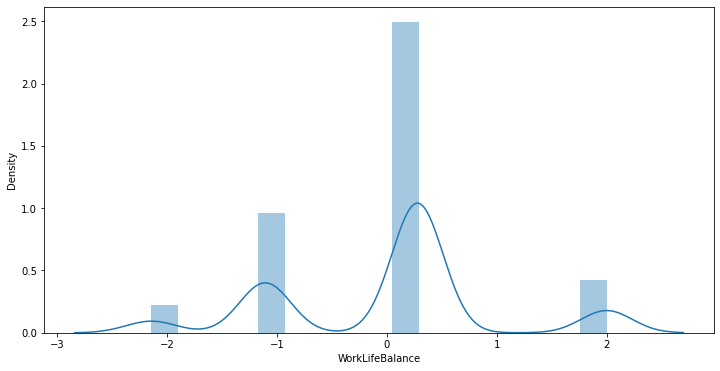

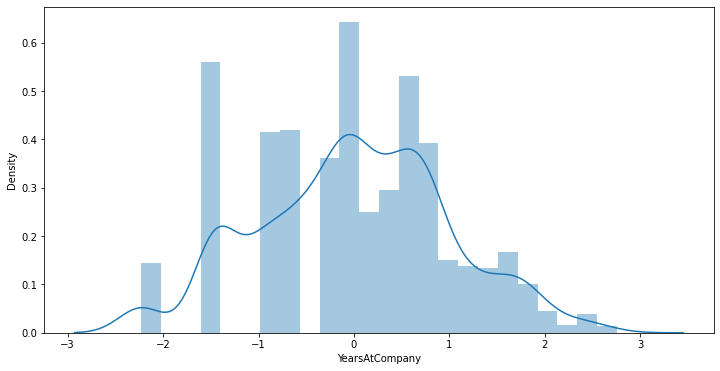

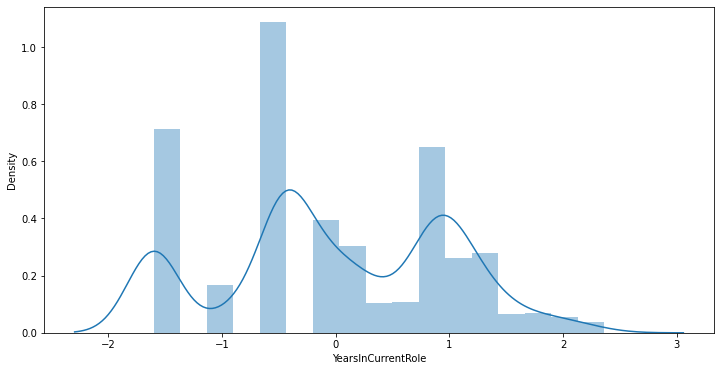

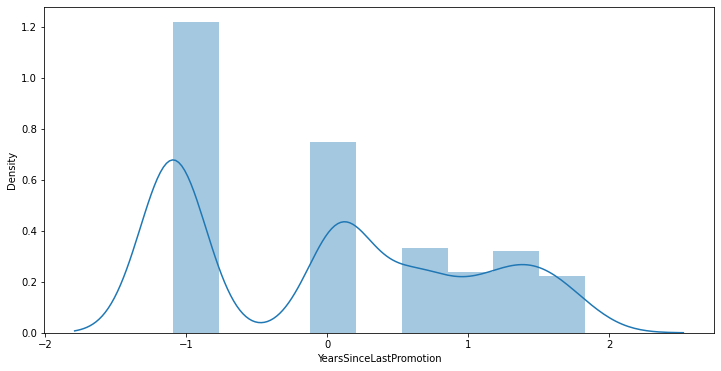

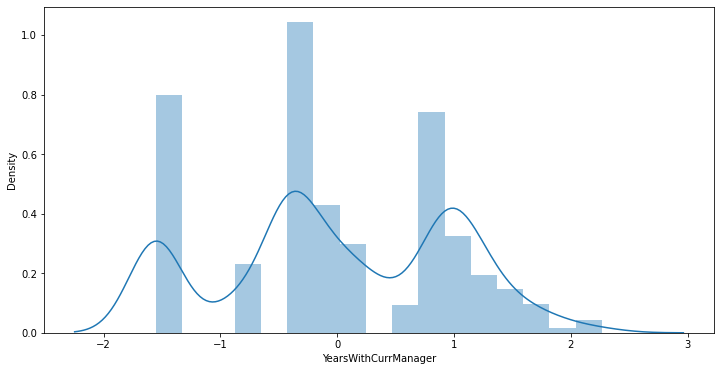

In [52]:
for i in ds.columns:
    plt.figure(figsize = (12,6))
    sns.distplot(ds[i])

from above graph also we can see that the column with numeric values are fixed where as the columns which was having object values are kept as it was

Now lets seperate our Target and Independent variable for further process

In [53]:
X = ds.drop('Attrition', axis = 1)
Y = ds['Attrition']

As we have Splitted out data into two now lets see out independent variable and lets scale it if required

In [54]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,-1.494085,2,-0.960488,2,0,94,3,0.241622,7,4,2,5993,19479,1.621331,1.591746,-1.488918,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,1,279,1,0.243416,1,-0.960488,3,1,61,2,0.241622,6,2,1,5130,24907,-0.571302,-0.628241,1.679689,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,2,1373,1,-1.031215,2,1.247620,4,1,92,2,-1.170135,2,3,2,2090,2396,1.271339,1.591746,0.201133,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,1,1392,1,-0.700347,4,-0.960488,4,0,56,3,-1.170135,6,3,1,2909,23159,-0.571302,1.591746,-1.488918,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,2,591,1,-1.031215,1,0.697390,1,1,40,3,-1.170135,2,2,1,3468,16632,1.766182,-0.628241,-0.948760,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


from above we can see that there are many range in our independent variable so we are scaling the value

In [55]:
sc = StandardScaler()

In [56]:
X_new = sc.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

In [57]:
X_new.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.494085,-0.891688,-0.960488,-0.660531,-1.224745,1.383138,0.379672,0.241622,1.032716,1.153254,1.236820,-0.108350,0.726020,1.621331,1.591746,-1.488918,-0.426230,-1.584178,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.322365,-0.913194,-1.297775,-0.493817,0.243416,-1.868426,-0.960488,0.254625,0.816497,-0.240677,-1.026167,0.241622,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.571302,-0.628241,1.679689,2.346151,1.191438,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.008343,0.590048,1.414363,-0.493817,-1.031215,-0.891688,1.247620,1.169781,0.816497,1.284725,-1.026167,-1.170135,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.271339,1.591746,0.201133,-0.426230,-0.658973,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.429664,-0.913194,1.461466,-0.493817,-0.700347,1.061787,-0.960488,1.169781,-1.224745,-0.486709,0.379672,-1.170135,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.571302,1.591746,-1.488918,-0.426230,0.266233,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.086676,0.590048,-0.524295,-0.493817,-1.031215,-1.868426,0.697390,-1.575686,0.816497,-1.274014,0.379672,-1.170135,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,1.766182,-0.628241,-0.948760,-0.426230,1.191438,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


from above we can see that we have successfully converted our value in one scale now we will save X_new as X so that it will be easy for us to maintain the data

In [58]:
X = X_new

In [59]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.494085,-0.891688,-0.960488,-0.660531,-1.224745,1.383138,0.379672,0.241622,1.032716,1.153254,1.236820,-0.108350,0.726020,1.621331,1.591746,-1.488918,-0.426230,-1.584178,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.322365,-0.913194,-1.297775,-0.493817,0.243416,-1.868426,-0.960488,0.254625,0.816497,-0.240677,-1.026167,0.241622,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.571302,-0.628241,1.679689,2.346151,1.191438,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.008343,0.590048,1.414363,-0.493817,-1.031215,-0.891688,1.247620,1.169781,0.816497,1.284725,-1.026167,-1.170135,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.271339,1.591746,0.201133,-0.426230,-0.658973,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.429664,-0.913194,1.461466,-0.493817,-0.700347,1.061787,-0.960488,1.169781,-1.224745,-0.486709,0.379672,-1.170135,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.571302,1.591746,-1.488918,-0.426230,0.266233,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.086676,0.590048,-0.524295,-0.493817,-1.031215,-1.868426,0.697390,-1.575686,0.816497,-1.274014,0.379672,-1.170135,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,1.766182,-0.628241,-0.948760,-0.426230,1.191438,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


### Now lets Split the data in training and testing data 

spliting is done with the help of train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

lets first test with random_state as 42 later we will find the best random state and use it

In [61]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)
predlr = lr.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predlr))
print("Classification Report", classification_report(Y_test, predlr))
print("Confusion Matrix", confusion_matrix(Y_test, predlr))

Accuracy Score: 0.9012345679012346
Classification Report               precision    recall  f1-score   support

           0       0.91      0.98      0.95       283
           1       0.74      0.34      0.47        41

    accuracy                           0.90       324
   macro avg       0.82      0.66      0.71       324
weighted avg       0.89      0.90      0.88       324

Confusion Matrix [[278   5]
 [ 27  14]]


as we can see that we have got 90% accuracy score for Logistic regression at random_state 42 now lets find the best random state

In [62]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]

In [63]:
import time
start = time.time()
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    for m in models:
        print("Model Name:",m)
        m.fit(X_train, Y_train)
        print("Traning Score:", m.score(X_train, Y_train))
        pred = m.predict(X_test)
        acc = accuracy_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            
print("Maximum Accuracy is {} at random_state {} for model {}". format(maxacc, maxrs, m))
end  = time.time()
print(f"Runtime of the program is {end - start}")

Model Name: LogisticRegression()
Traning Score: 0.887434554973822
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.8342059336823735
Model Name: LogisticRegression()
Traning Score: 0.8769633507853403
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestCla

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9171029668411868
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8272251308900523
Model Name: LogisticRegression()
Traning Score: 0.8787085514834206
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8987783595113438
Model Name: SVC()
Traning Score: 0.9057591623036649
Model Name: KNeighborsClassifier()
Traning Score: 0.8717277486910995
Model Name: GaussianNB()
Traning Score: 0.8150087260034904
Model Name: LogisticRegression()
Traning Score: 0.8848167539267016
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: K

Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9101221640488656
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8097731239092496
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9022687609075044
Model Name: SVC()
Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.8734729493891797
Model Name: GaussianNB()
Traning Score: 0.821

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.912739965095986
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.881326352530541
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9171029668411868
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8254799301919721
Model Name: LogisticRegression()
Traning Score: 0.881326352530541
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: K

Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.794066317626527
Model Name: LogisticRegression()
Traning Score: 0.8900523560209425
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8987783595113438
Model Name: SVC()
Traning Score: 0.9301919720767888
Model Name: KNeighborsClassifier()
Traning Score: 0.887434554973822
Model Name: GaussianNB()
Traning Score: 0.8333333333333334
Model Name: LogisticRegression()
Traning Score: 0.8804537521815009
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 0.9991273996509599
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: KNeighborsClassifier()
Traning Score: 0.8708551483420593
Model Name: GaussianNB()
Traning Sc

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9118673647469459
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.8743455497382199
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9118673647469459
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.819371727748691
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name:

Traning Score: 0.9066317626527051
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.819371727748691
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name: KNeighborsClassifier()
Traning Score: 0.8726003490401396
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8883071553228621
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.8734729493891797
Model Name: GaussianNB()
Traning Score: 0.8097

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9022687609075044
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.8080279232111692
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.8795811518324608
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: 

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9022687609075044
Model Name: SVC()
Traning Score: 0.912739965095986
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.819371727748691
Model Name: LogisticRegression()
Traning Score: 0.8865619546247818
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9284467713787086
Model Name: KNeighborsClassifier()
Traning Score: 0.8726003490401396
Model Name: GaussianNB()
Traning Score: 0.8132635253054101
Model Name: LogisticRegression()
Traning Score: 0.8734729493891797
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNe

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9144851657940664
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: KNeighborsClassifier()
Traning Score: 0.8865619546247818
Model Name: GaussianNB()
Traning Score: 0.8167539267015707
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8952879581151832
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: K

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: KNeighborsClassifier()
Traning Score: 0.8830715532286213
Model Name: GaussianNB()
Traning Score: 0.8202443280977313
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9092495636998255
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KN

Traning Score: 0.9214659685863874
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8158813263525305
Model Name: LogisticRegression()
Traning Score: 0.8691099476439791
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.9066317626527051
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.8289703315881326
Model Name: LogisticRegression()
Traning Score: 0.8734729493891797
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8952879581151832
Model Name: SVC()
Traning Score: 0.9083769633507853
Model Name: KNeighborsClassifier()
Traning Score: 0.8699825479930192
Model Name: GaussianNB()
Traning Score: 0.823

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8280977312390925
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8996509598603839
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.8883071553228621
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8979057591623036
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name

Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8664921465968587
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8106457242582897
Model Name: LogisticRegression()
Traning Score: 0.8691099476439791
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.887434554973822
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.8726003490401396
Model Name: GaussianNB()
Traning Score: 0.80977

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8952879581151832
Model Name: SVC()
Traning Score: 0.9075043630017452
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8211169284467714
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8307155322862129
Model Name: LogisticRegression()
Traning Score: 0.8734729493891797
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9083769633507853
Model Name

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8726003490401396
Model Name: GaussianNB()
Traning Score: 0.8150087260034904
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8926701570680629
Model Name: GaussianNB()
Traning Score: 0.806282722513089
Model Name: LogisticRegression()
Traning Score: 0.8787085514834206
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.893542757417103
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KN

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9301919720767888
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8272251308900523
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9136125654450262
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name: KNeighborsClassifier()
Traning Score: 0.8708551483420593
Model Name: GaussianNB()
Traning Score: 0.8027923211169284
Model Name: LogisticRegression()
Traning Score: 0.8926701570680629
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name

Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.806282722513089
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8080279232111692
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9109947643979057
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8272

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9101221640488656
Model Name: KNeighborsClassifier()
Traning Score: 0.8708551483420593
Model Name: GaussianNB()
Traning Score: 0.8019197207678883
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9136125654450262
Model Name: SVC()
Traning Score: 0.9267015706806283
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8184991273996509
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9048865619546248
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8202443280977313
Model Name: LogisticRegression()
Traning Score: 0.8865619546247818
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.8699825479930192
Model Name: GaussianNB()
Traning Score: 0.8272251308900523
Model Name: LogisticRegression()
Traning Score: 0.881326352530541
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8952879581151832
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name:

Traning Score: 0.8848167539267016
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8909249563699826
Model Name: SVC()
Traning Score: 0.9075043630017452
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.881326352530541
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8089005235602095
Model Name: LogisticRegression()
Traning Score: 0.88307155

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9092495636998255
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8158813263525305
Model Name: LogisticRegression()
Traning Score: 0.8848167539267016
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: KNeighborsClassifier()
Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.819371727748691
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name:

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8158813263525305
Model Name: LogisticRegression()
Traning Score: 0.8804537521815009
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8743455497382199
Model Name: GaussianNB()
Traning Score: 0.8167539267015707
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name:

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.824607329842932
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9022687609075044
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name: KNeighborsClassifier()
Traning Score: 0.8848167539267016
Model Name: GaussianNB()
Traning Score: 0.8324607329842932
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: K

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8228621291448517
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9153577661431065
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8743455497382199
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.8743455497382199
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 0.9991273996509599
Model Name: AdaBoostClassifier()
Traning Score: 0.918848167539267
Model Name: SVC()
Traning Score: 0.916230366492146

Traning Score: 0.9109947643979057
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8228621291448517
Model Name: LogisticRegression()
Traning Score: 0.8769633507853403
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8211169284467714
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9048865619546248
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8664921465968587
Model Name: GaussianNB()
Traning Score: 0.808900

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8699825479930192
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9048865619546248
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8342059336823735
Model Name: LogisticRegression()
Traning Score: 0.8795811518324608
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9171029668411868
Model Name: 

Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8830715532286213
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.881326352530541
Model Name: GaussianNB()
Traning Score: 0.8246

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8699825479930192
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8917975567190227
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8036649214659686
Model Name: LogisticRegression()
Traning Score: 0.8795811518324608
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8926701570680629
Model Name: SVC()
Traning Score: 0.9101221640488656
Model Name: 

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8184991273996509
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 0.9991273996509599
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.881326352530541
Model Name: GaussianNB()
Traning Score: 0.8080279232111692
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9127399650959

Traning Score: 0.9109947643979057
Model Name: KNeighborsClassifier()
Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8106457242582897
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.820244

Traning Score: 0.8804537521815009
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9101221640488656
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8883071553228621
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9109947643979057
Model Name: SVC()
Traning Score: 0.9293193717277487
Model Name: KNeighborsClassifier()
Traning Score: 0.887434554973822
Model Name: GaussianNB()
Traning Score: 0.8298429319371727
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9101221640488656
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KNeighborsClassifier()
Traning Score: 0.8856893542757417
Model Name: GaussianNB()
Traning Score: 0.8184991273996509
Model Name: LogisticRegression()
Traning Score: 0.8804537521815009
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.8734729493891797
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name

Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.887434554973822
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9214659685863874
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.824607329842932
Model Name: LogisticRegression()
Traning Score: 0.8769633507853403
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8158813263525305
Model Name: LogisticRegression()
Traning Score: 0.881326352

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9171029668411868
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.7984293193717278
Model Name: LogisticRegression()
Traning Score: 0.8760907504363001
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8944153577661431
Model Name: SVC()
Traning Score: 0.9101221640488656
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8089005235602095
Model Name: LogisticRegression()
Traning Score: 0.8743455497382199
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name:

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8987783595113438
Model Name: SVC()
Traning Score: 0.9214659685863874
Model Name: KNeighborsClassifier()
Traning Score: 0.8699825479930192
Model Name: GaussianNB()
Traning Score: 0.8211169284467714
Model Name: LogisticRegression()
Traning Score: 0.8734729493891797
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8743455497382199
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.912739965095986
Model Name:

Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8263525305410122
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8917975567190227
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8734729493891797
Model Name: GaussianNB()
Traning Score: 0.806282722513089
Model Name: LogisticRegression()
Traning Score: 0.881326352530541
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8979057591623036
Model Name: SVC()
Traning Score: 0.9144851657940664
Model Name: KNeighborsClassifier()
Traning Score: 0.8726003490401396
Model Name: GaussianNB()
Traning Score: 0.8132635253054101
Model Name: LogisticRegression()
Traning Score: 0.87958115

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9066317626527051
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8184991273996509
Model Name: LogisticRegression()
Traning Score: 0.8804537521815009
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8141361256544503
Model Name: LogisticRegression()
Traning Score: 0.8760907504363001
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9109947643979057
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8237347294938918
Model Name: LogisticRegression()
Traning Score: 0.8778359511343804
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.8115183246073299
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: 

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8071553228621291
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.824607329842932
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9075043630017452
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name: K

Traning Score: 0.9171029668411868
Model Name: KNeighborsClassifier()
Traning Score: 0.8804537521815009
Model Name: GaussianNB()
Traning Score: 0.8237347294938918
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8961605584642234
Model Name: SVC()
Traning Score: 0.9136125654450262
Model Name: KNeighborsClassifier()
Traning Score: 0.87521815008726
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.8787085514834206
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8909249563699826
Model Name: SVC()
Traning Score: 0.9040139616055847
Model Name: KNeighborsClassifier()
Traning Score: 0.8734729493891797
Model Name: GaussianNB()
Traning Score: 0.8184991

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9031413612565445
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8734729493891797
Model Name: GaussianNB()
Traning Score: 0.8150087260034904
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9267015706806283
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8280977312390925
Model Name: LogisticRegression()
Traning Score: 0.8787085514834206
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9013961605584643
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name:

Traning Score: 0.8760907504363001
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8769633507853403
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9162303664921466
Model Name: KNeighborsClassifier()
Traning Score: 0.868237347294939
Model Name: GaussianNB()
Traning Score: 0.8228621291448517
Model Name: LogisticRegression()
Traning Score: 0.8883071553228621
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8830715532286213
Model Name: GaussianNB()
Traning Score: 0.8254799301919721
Model Name: LogisticRegression()
Traning Score: 0.8787085

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9118673647469459
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8926701570680629
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8987783595113438
Model Name: SVC()
Traning Score: 0.9223385689354275
Model Name: KNeighborsClassifier()
Traning Score: 0.8699825479930192
Model Name: GaussianNB()
Traning Score: 0.8132635253054101
Model Name: LogisticRegression()
Traning Score: 0.8760907504363001
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: 

Model Name: GaussianNB()
Traning Score: 0.8167539267015707
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9171029668411868
Model Name: KNeighborsClassifier()
Traning Score: 0.8743455497382199
Model Name: GaussianNB()
Traning Score: 0.81239092495637
Model Name: LogisticRegression()
Traning Score: 0.887434554973822
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 0.9991273996509599
Model Name: AdaBoostClassifier()
Traning Score: 0.9057591623036649
Model Name: SVC()
Traning Score: 0.9232111692844677
Model Name: KNeighborsClassifier()
Traning Score: 0.881326352530541
Model Name: GaussianNB()
Traning Score: 0.8289703315881326
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: 

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8979057591623036
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8795811518324608
Model Name: GaussianNB()
Traning Score: 0.7984293193717278
Model Name: LogisticRegression()
Traning Score: 0.8839441535776614
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9109947643979057
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: KNeighborsClassifier()
Traning Score: 0.8883071553228621
Model Name: GaussianNB()
Traning Score: 0.8350785340314136
Model Name: LogisticRegression()
Traning Score: 0.8926701570680629
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9118673647469459
Model Name: SVC()
Traning Score: 0.9258289703315882
Model Name:

Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8952879581151832
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8080279232111692
Model Name: LogisticRegression()
Traning Score: 0.8865619546247818
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.9197207678883071
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.8350785340314136
Model Name: LogisticRegression()
Traning Score: 0.8769633507853403
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Mo

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8856893542757417
Model Name: SVC()
Traning Score: 0.912739965095986
Model Name: KNeighborsClassifier()
Traning Score: 0.8656195462478184
Model Name: GaussianNB()
Traning Score: 0.7897033158813264
Model Name: LogisticRegression()
Traning Score: 0.8691099476439791
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8970331588132635
Model Name: SVC()
Traning Score: 0.9040139616055847
Model Name: KNeighborsClassifier()
Traning Score: 0.8769633507853403
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8848167539267016
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.912739965095986
Model Name: SVC()
Traning Score: 0.9153577661431065
Model Name: 

Traning Score: 0.9205933682373473
Model Name: KNeighborsClassifier()
Traning Score: 0.8839441535776614
Model Name: GaussianNB()
Traning Score: 0.8132635253054101
Model Name: LogisticRegression()
Traning Score: 0.8891797556719022
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.900523560209424
Model Name: SVC()
Traning Score: 0.9205933682373473
Model Name: KNeighborsClassifier()
Traning Score: 0.8821989528795812
Model Name: GaussianNB()
Traning Score: 0.81239092495637
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8987783595113438
Model Name: SVC()
Traning Score: 0.918848167539267
Model Name: KNeighborsClassifier()
Traning Score: 0.8830715532286213
Model Name: GaussianNB()
Traning Score: 0.8246073

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9040139616055847
Model Name: SVC()
Traning Score: 0.9275741710296684
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8176265270506108
Model Name: LogisticRegression()
Traning Score: 0.87521815008726
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.8979057591623036
Model Name: SVC()
Traning Score: 0.9118673647469459
Model Name: KNeighborsClassifier()
Traning Score: 0.8787085514834206
Model Name: GaussianNB()
Traning Score: 0.8219895287958116
Model Name: LogisticRegression()
Traning Score: 0.8821989528795812
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.924956369982548
Model Name: K

Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9179755671902269
Model Name: KNeighborsClassifier()
Traning Score: 0.8691099476439791
Model Name: GaussianNB()
Traning Score: 0.8132635253054101
Model Name: LogisticRegression()
Traning Score: 0.8856893542757417
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9022687609075044
Model Name: SVC()
Traning Score: 0.9171029668411868
Model Name: KNeighborsClassifier()
Traning Score: 0.8778359511343804
Model Name: GaussianNB()
Traning Score: 0.8307155322862129
Model Name: LogisticRegression()
Traning Score: 0.8830715532286213
Model Name: DecisionTreeClassifier()
Traning Score: 1.0
Model Name: RandomForestClassifier()
Traning Score: 1.0
Model Name: AdaBoostClassifier()
Traning Score: 0.9083769633507853
Model Name: SVC()
Traning Score: 0.9240837696335078
Model Name

So from above we can see that maximum accuracy is 92.28% at random state 281 for gaussianNB

lets now use random state 281 for all the algorithms and see the best accuracy score after that we will compare it with cross validation score and then we will select the best model

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 281)

In [65]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)
predlr = lr.predict(X_test)
acclr  = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:",acclr)
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
print("Classifiaction report:",classification_report(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
f1scorelr = f1_score(Y_test, predlr)

Accuracy Score: 89.19753086419753
Confusion Matrix: [[271   9]
 [ 26  18]]
Classifiaction report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       280
           1       0.67      0.41      0.51        44

    accuracy                           0.89       324
   macro avg       0.79      0.69      0.72       324
weighted avg       0.88      0.89      0.88       324



In [66]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
predtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print("Accuracy Score:", accdtc)
print("Confusion Matrix", confusion_matrix(Y_test, predtc))
print("Classification report", classification_report(Y_test, predtc))
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
f1scoredtc = f1_score(Y_test, predtc)

Accuracy Score: 80.24691358024691
Confusion Matrix [[244  36]
 [ 28  16]]
Classification report               precision    recall  f1-score   support

           0       0.90      0.87      0.88       280
           1       0.31      0.36      0.33        44

    accuracy                           0.80       324
   macro avg       0.60      0.62      0.61       324
weighted avg       0.82      0.80      0.81       324



In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc.score(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score", accrfc)
print("Classification Report:",classification_report(Y_test, predrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
f1scorerfc = f1_score(Y_test, predrfc)

Accuracy Score 87.65432098765432
Classification Report:               precision    recall  f1-score   support

           0       0.88      1.00      0.93       280
           1       0.83      0.11      0.20        44

    accuracy                           0.88       324
   macro avg       0.86      0.56      0.57       324
weighted avg       0.87      0.88      0.83       324

Confusion Matrix: [[279   1]
 [ 39   5]]


In [68]:
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
adb.score(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print("Accuracy Score:", accuracy_score(Y_test, predadb))
print("Classification Report:", classification_report(Y_test, predadb))
print("Confusion Matrix:", confusion_matrix(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
f1scoreadb = f1_score(Y_test, predadb)

Accuracy Score: 0.9228395061728395
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       280
           1       0.95      0.45      0.62        44

    accuracy                           0.92       324
   macro avg       0.94      0.73      0.79       324
weighted avg       0.93      0.92      0.91       324

Confusion Matrix: [[279   1]
 [ 24  20]]


In [69]:
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print("Accuracy Score:", accsvc)
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
print("Classification Report:", classification_report(Y_test, predsvc))
scoresvc = cross_val_score(svc, X, Y, cv= 5)
scoresvc = scoresvc.mean()*100
f1scoresvc = f1_score(Y_test, predsvc)

Accuracy Score: 88.88888888888889
Confusion Matrix: [[280   0]
 [ 36   8]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94       280
           1       1.00      0.18      0.31        44

    accuracy                           0.89       324
   macro avg       0.94      0.59      0.62       324
weighted avg       0.90      0.89      0.85       324



In [70]:
knn = KNeighborsClassifier()
knn.fit(X_train ,Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print("Accuracy Score:",accknn)
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
print("Classification Report:", classification_report(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
f1scoreknn = f1_score(Y_test, predknn)

Accuracy Score: 87.34567901234568
Confusion Matrix: [[276   4]
 [ 37   7]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.99      0.93       280
           1       0.64      0.16      0.25        44

    accuracy                           0.87       324
   macro avg       0.76      0.57      0.59       324
weighted avg       0.85      0.87      0.84       324



In [71]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_train, Y_train)
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print("Accuracy Score:", accgnb)
print("Classification Report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
f1scoregnb = f1_score(Y_test, predgnb)

Accuracy Score: 82.4074074074074
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.85      0.89       280
           1       0.41      0.64      0.50        44

    accuracy                           0.82       324
   macro avg       0.67      0.74      0.69       324
weighted avg       0.87      0.82      0.84       324

Confusion Matrix: [[239  41]
 [ 16  28]]


lets now see the Accuracy Score, Cross Validation score and f1 score and compare the best model between all of them

In [72]:
diff = {
    'Name of the model':['Logistic Regression','Decision Tree', 'Random Forest', 'Adaboost', 'SVC', 'KNeighbors', 'Gaussian NB'],
    'Accuracy Score':[acclr, accdtc, accrfc, accadb, accsvc, accknn, accgnb],
    'Cross Validation Score':[scorelr, scoredtc, scorerfc, scoreadb, scoresvc, scoreknn, scoregnb],
    'Accuracy Score - Cross Validation Score':[acclr-scorelr, accdtc-scoredtc, accrfc - scorerfc, accadb-scoreadb,accsvc-scoresvc,accknn-scoreknn,accgnb-scoregnb],
    'F1 Score':[f1scorelr, f1scoredtc,f1scorerfc,f1scoreadb,f1scoresvc,f1scoreknn,f1scoregnb]
}

In [73]:
difference = pd.DataFrame.from_dict(diff)

In [74]:
difference

,Name of the model,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score,F1 Score
0,Logistic Regression,89.197531,87.006803,2.190728,0.507042
1,Decision Tree,80.246914,77.346939,2.899975,0.333333
2,Random Forest,87.654321,85.442177,2.212144,0.200000
3,Adaboost,92.283951,87.074830,5.209121,0.615385
4,SVC,88.888889,86.394558,2.494331,0.307692
5,KNeighbors,87.345679,85.170068,2.175611,0.254545
6,Gaussian NB,82.407407,81.496599,0.910809,0.495575


from above we can see that Decision tree, Random forest did the best but the f1 score is highest for Adaboost, Logistic Regression, Gaussian NB So we will do all the algorithms and find out the best

Now we will perform GridSearchCV for all the Models to improve the accuracy score

In [75]:
parameterlr = {
    'penalty':['l2','none'],
    'C':np.arange(1,20)
}

In [76]:
GSCVlr = GridSearchCV(lr, parameterlr)
GSCVlr.fit(X_train, Y_train)
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictlr))

Accuracy Score: 0.8919753086419753


In [77]:
parameterdtc = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(1,15)
}

In [78]:
GSCVdtc = GridSearchCV(dtc, parameterdtc)
GSCVdtc.fit(X_train, Y_train)
GSCV_predictdtc = GSCVdtc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictdtc))

Accuracy Score: 0.8734567901234568


In [79]:
parameterrfc = {
    'n_estimators':np.arange(1,30),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,15)
}

In [80]:
GSCVrfc = GridSearchCV(rfc, parameterrfc)
GSCVrfc.fit(X_train, Y_train)
GSCV_predictrfc = GSCVrfc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictrfc))

Accuracy Score: 0.8858024691358025


In [81]:
parameteradb = {
    'n_estimators':np.arange(1,30),
    'algorithm':['SAMME','SAMME.R']
}

In [82]:
GSCVadb = GridSearchCV(adb, parameteradb)
GSCVadb.fit(X_train, Y_train)
GSCV_predictadb = GSCVadb.best_estimator_.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictadb))

Accuracy Score 0.9012345679012346


In [83]:
parametersvc = {
    'C':np.arange(1,30),
    'kernel':['rbf','poly','linear'],
    'degree':np.arange(1,15),
    'gamma':['scale','auto']
}

In [84]:
GSCVsvc = GridSearchCV(svc, parametersvc)
GSCVsvc.fit(X_train, Y_train)
GSCV_predictsvc = GSCVsvc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictsvc))

Accuracy Score: 0.8919753086419753


In [85]:
parameterknn = {
    'n_neighbors':np.arange(1,10),
    'weights':['uniform','distance'],
    'algorithm':['ball_tree', 'kd_tree', 'auto','brute'],
    'p':np.arange(1,10),
    'n_jobs':np.arange(1,10)
}

In [86]:
GSCVknn = GridSearchCV(knn, parameterknn)
GSCVknn.fit(X_train, Y_train)
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictknn))

Accuracy Score 0.8703703703703703


In [87]:
parametergnb = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [88]:
GSCVgnb = GridSearchCV(gnb, parametergnb)
GSCVgnb.fit(X_train, Y_train)
GSCV_predictgnb = GSCVgnb.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictgnb))

Accuracy Score: 0.8240740740740741


lets see accuracy score of each model after GridSearchCV

In [89]:
print("Logistic regression")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictlr))
print("Classification report", classification_report(Y_test, GSCV_predictlr))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictlr))
print("F1 Score", f1_score(Y_test, GSCV_predictlr))

Logistic regression
Accuracy Score 0.8919753086419753
Classification report               precision    recall  f1-score   support

           0       0.91      0.97      0.94       280
           1       0.67      0.41      0.51        44

    accuracy                           0.89       324
   macro avg       0.79      0.69      0.72       324
weighted avg       0.88      0.89      0.88       324

COnfusion Matrix [[271   9]
 [ 26  18]]
F1 Score 0.5070422535211268


In [90]:
print("Decision Tree Classifier")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictdtc))
print("Classification report", classification_report(Y_test, GSCV_predictdtc))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictdtc))
print("F1 Score", f1_score(Y_test, GSCV_predictdtc))

Decision Tree Classifier
Accuracy Score 0.8734567901234568
Classification report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       280
           1       0.59      0.23      0.33        44

    accuracy                           0.87       324
   macro avg       0.74      0.60      0.63       324
weighted avg       0.85      0.87      0.85       324

COnfusion Matrix [[273   7]
 [ 34  10]]
F1 Score 0.32786885245901637


In [91]:
print("Random Forest Classifier")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictdtc))
print("Classification report", classification_report(Y_test, GSCV_predictdtc))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictdtc))
print("F1 Score", f1_score(Y_test, GSCV_predictrfc))

Random Forest Classifier
Accuracy Score 0.8734567901234568
Classification report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       280
           1       0.59      0.23      0.33        44

    accuracy                           0.87       324
   macro avg       0.74      0.60      0.63       324
weighted avg       0.85      0.87      0.85       324

COnfusion Matrix [[273   7]
 [ 34  10]]
F1 Score 0.3508771929824561


In [92]:
print("Adaboost Classifier")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictadb))
print("Classification report", classification_report(Y_test, GSCV_predictadb))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictadb))
print("F1 Score", f1_score(Y_test, GSCV_predictadb))

Adaboost Classifier
Accuracy Score 0.9012345679012346
Classification report               precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.93      0.30      0.45        44

    accuracy                           0.90       324
   macro avg       0.91      0.65      0.70       324
weighted avg       0.90      0.90      0.88       324

COnfusion Matrix [[279   1]
 [ 31  13]]
F1 Score 0.4482758620689656


In [93]:
print("SVC")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictsvc))
print("Classification report", classification_report(Y_test, GSCV_predictsvc))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictsvc))
print("F1 Score", f1_score(Y_test, GSCV_predictsvc))

SVC
Accuracy Score 0.8919753086419753
Classification report               precision    recall  f1-score   support

           0       0.91      0.97      0.94       280
           1       0.70      0.36      0.48        44

    accuracy                           0.89       324
   macro avg       0.80      0.67      0.71       324
weighted avg       0.88      0.89      0.88       324

COnfusion Matrix [[273   7]
 [ 28  16]]
F1 Score 0.4776119402985074


In [94]:
print("KNeighbour Classifier")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictknn))
print("Classification report", classification_report(Y_test, GSCV_predictknn))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictknn))
print("F1 Score", f1_score(Y_test, GSCV_predictknn))

KNeighbour Classifier
Accuracy Score 0.8703703703703703
Classification report               precision    recall  f1-score   support

           0       0.88      0.99      0.93       280
           1       0.62      0.11      0.19        44

    accuracy                           0.87       324
   macro avg       0.75      0.55      0.56       324
weighted avg       0.84      0.87      0.83       324

COnfusion Matrix [[277   3]
 [ 39   5]]
F1 Score 0.1923076923076923


In [95]:
print("Gaussian NB")
print("Accuracy Score", accuracy_score(Y_test, GSCV_predictgnb))
print("Classification report", classification_report(Y_test, GSCV_predictgnb))
print("COnfusion Matrix", confusion_matrix(Y_test, GSCV_predictgnb))
print("F1 Score", f1_score(Y_test, GSCV_predictgnb))

Gaussian NB
Accuracy Score 0.8240740740740741
Classification report               precision    recall  f1-score   support

           0       0.94      0.85      0.89       280
           1       0.41      0.64      0.50        44

    accuracy                           0.82       324
   macro avg       0.67      0.74      0.69       324
weighted avg       0.87      0.82      0.84       324

COnfusion Matrix [[239  41]
 [ 16  28]]
F1 Score 0.49557522123893816


In [96]:
fpr, tpr, thresholds = roc_curve(Y_test, GSCV_predictlr)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds = roc_curve(Y_test, GSCV_predictdtc)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds = roc_curve(Y_test, GSCV_predictrfc)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds = roc_curve(Y_test, GSCV_predictadb)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds = roc_curve(Y_test, GSCV_predictsvc)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds = roc_curve(Y_test, GSCV_predictknn)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, thresholds = roc_curve(Y_test, GSCV_predictgnb)
roc_auc6 = auc(fpr6, tpr6)

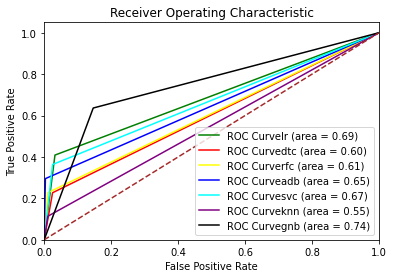

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='green', label = "ROC Curvelr (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC Curvedtc (area = %0.2f)" %roc_auc1)
plt.plot(fpr2, tpr2, color='yellow', label = "ROC Curverfc (area = %0.2f)" %roc_auc2)
plt.plot(fpr3, tpr3, color='blue', label = "ROC Curveadb (area = %0.2f)" %roc_auc3)
plt.plot(fpr4, tpr4, color='cyan', label = "ROC Curvesvc (area = %0.2f)" %roc_auc4)
plt.plot(fpr5, tpr5, color='purple', label = "ROC Curveknn (area = %0.2f)" %roc_auc5)
plt.plot(fpr6, tpr6, color='black', label = "ROC Curvegnb (area = %0.2f)" %roc_auc6)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

from above we can see that Gaussian NB has the best area covered that is 74% so we save gnb model for deployment

In [98]:
joblib.dump(GSCVgnb.best_estimator_, 'IBMAttrition.pkl')

['IBMAttrition.pkl']

## from above we can see that Gaussain NB is measuring the performance across all possible classification thresholds with an Area under Curve of 74% so we are choosing this model.

#### lets see the actual and predicted values

In [99]:
Y_test

1232    0
283     0
1172    0
681     0
1150    0
       ..
1224    0
173     0
988     0
334     0
551     0
Name: Attrition, Length: 324, dtype: int64

In [100]:
GSCV_predictgnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
pd.set_option('display.max_rows', None)

In [102]:
comp = {
    'True Values':Y_test,
    'Predicted Values':GSCV_predictgnb
}

In [103]:
Compare = pd.DataFrame.from_dict(comp)

In [104]:
Compare

,True Values,Predicted Values
1232,0,0
283,0,0
1172,0,0
681,0,0
1150,0,0
1320,0,0
561,0,0
400,0,0
386,0,0
1206,0,0


### By using IMBAttrition.pkl we can use it for different Attrition Dataset with similar column